In [159]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
#Preprocessing of Abalone dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')
warnings.filterwarnings('ignore')

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
#Data Summarization
abalone_describe = df.describe()
print(abalone_describe)

summarize = pd.DataFrame(columns=['mean', 'median','variance','skew','kurtosis'])
summarize['mean'] = df.mean()
summarize['median'] = df.median()
summarize['variance'] = df.var()
summarize['skew'] = df.skew()
summarize['kurtosis'] = df.kurtosis()
display(summarize)

            Length     Diameter       Height  Whole_weight  Sucked_weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000    4177.000000   
mean      0.523992     0.407881     0.139516      0.828742       0.359367   
std       0.120093     0.099240     0.041827      0.490389       0.221963   
min       0.075000     0.055000     0.000000      0.002000       0.001000   
25%       0.450000     0.350000     0.115000      0.441500       0.186000   
50%       0.545000     0.425000     0.140000      0.799500       0.336000   
75%       0.615000     0.480000     0.165000      1.153000       0.502000   
max       0.815000     0.650000     1.130000      2.825500       1.488000   

       Viscera_weight  Shell_weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  


,mean,median,variance,skew,kurtosis
Length,0.523992,0.5450,0.014422,-0.639873,0.064621
Diameter,0.407881,0.4250,0.009849,-0.609198,-0.045476
Height,0.139516,0.1400,0.001750,3.128817,76.025509
Whole_weight,0.828742,0.7995,0.240481,0.530959,-0.023644
Sucked_weight,0.359367,0.3360,0.049268,0.719098,0.595124
Viscera_weight,0.180594,0.1710,0.012015,0.591852,0.084012
Shell_weight,0.238831,0.2340,0.019377,0.620927,0.531926
Rings,9.933684,9.0000,10.395266,1.114102,2.330687


In [7]:
missing_values = df.isna().sum()
print(missing_values)

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Sucked_weight     0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64


Is there any missing data? Answer to this question can given by observing the output of isna(), we can see that for for all the columns we have got value 0, which means that there are no missing values for any of the columns in the abalone dataset.

In [8]:
if (missing_values>0).any():
    print("There are {} missing values\n".format(np.sum(missing_values)))
else:
    print("there are no missing data")

there are no missing data


In [9]:
sex_describe = df['Sex'].describe()
sex_unique = df['Sex'].unique()
print(sex_describe)
print("Total Unique Sex: ", sex_unique)
df['Sex'].value_counts()

count     4177
unique       3
top          M
freq      1528
Name: Sex, dtype: object
Total Unique Sex:  ['M' 'F' 'I']


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Finding correlations between 2 variables/columns in abalone dataset

In [10]:
features = df.select_dtypes(include=[np.number])
features_correlation = features.corr()
print(features_correlation)

                  Length  Diameter    Height  Whole_weight  Sucked_weight  \
Length          1.000000  0.986812  0.827554      0.925261       0.897914   
Diameter        0.986812  1.000000  0.833684      0.925452       0.893162   
Height          0.827554  0.833684  1.000000      0.819221       0.774972   
Whole_weight    0.925261  0.925452  0.819221      1.000000       0.969405   
Sucked_weight   0.897914  0.893162  0.774972      0.969405       1.000000   
Viscera_weight  0.903018  0.899724  0.798319      0.966375       0.931961   
Shell_weight    0.897706  0.905330  0.817338      0.955355       0.882617   
Rings           0.556720  0.574660  0.557467      0.540390       0.420884   

                Viscera_weight  Shell_weight     Rings  
Length                0.903018      0.897706  0.556720  
Diameter              0.899724      0.905330  0.574660  
Height                0.798319      0.817338  0.557467  
Whole_weight          0.966375      0.955355  0.540390  
Sucked_weight        

finding the correlation w.r.t to rings

In [11]:
print(features_correlation['Rings'])

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole_weight      0.540390
Sucked_weight     0.420884
Viscera_weight    0.503819
Shell_weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64


from the above block, we can see that only shell weight is somewhat correlated with rings columns. apart from this all other columns/parameters are not that much correlated with the rings. this would cause problem in the ring classification. 1 represents that the variables are highly correlated and 0 represents that variableas are not correlated.

<AxesSubplot:title={'center':'Correlation heatmap for Abalone dataset'}>

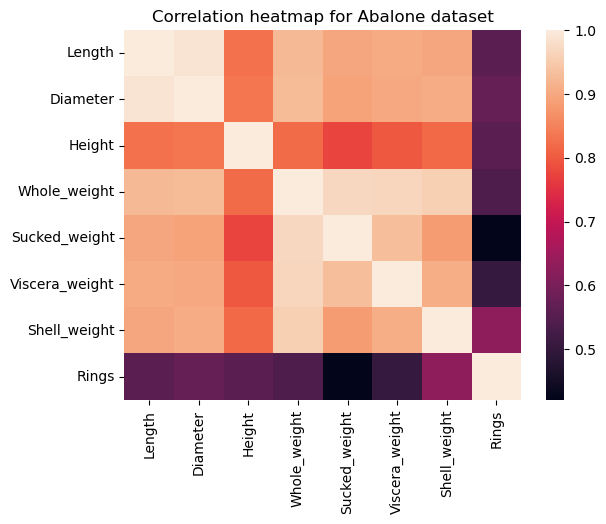

In [12]:
plt.title("Correlation heatmap for Abalone dataset")
sns.heatmap(features_correlation)

<AxesSubplot:title={'center':'Gaussian Curve for Rings on Log Normal Scale'}, xlabel='Rings', ylabel='Density'>

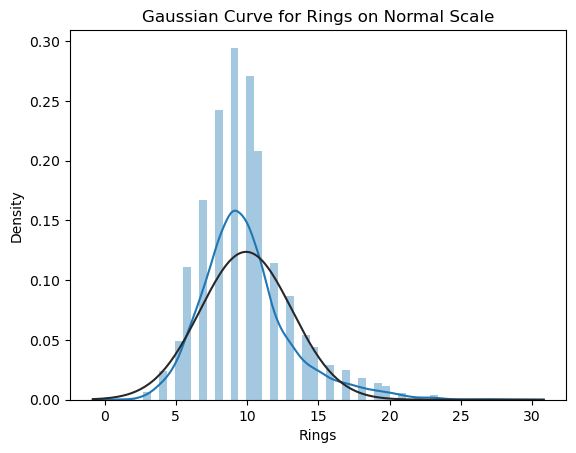

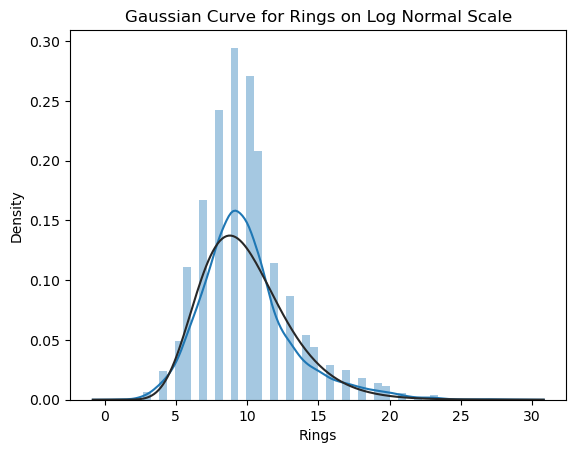

In [13]:
#Checking the histogram for Rings
rings = df['Rings']
plt.figure(1)
plt.title("Gaussian Curve for Rings on Normal Scale")
sns.distplot(rings,kde=True,fit=st.norm)

plt.figure(2)
plt.title("Gaussian Curve for Rings on Log Normal Scale")
sns.distplot(rings,kde=True,fit=st.lognorm)

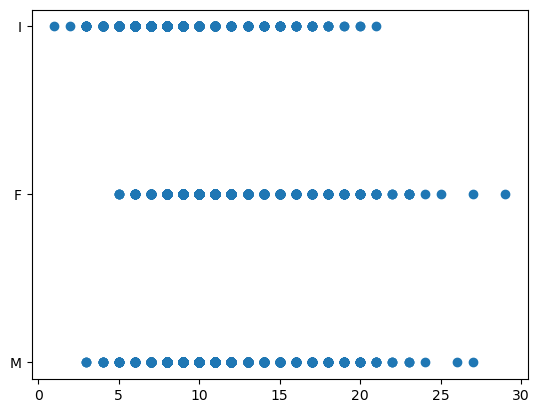

In [14]:
# Check any relationship between Sex and Rings
plt.scatter(y=df['Sex'], x=df['Rings'])

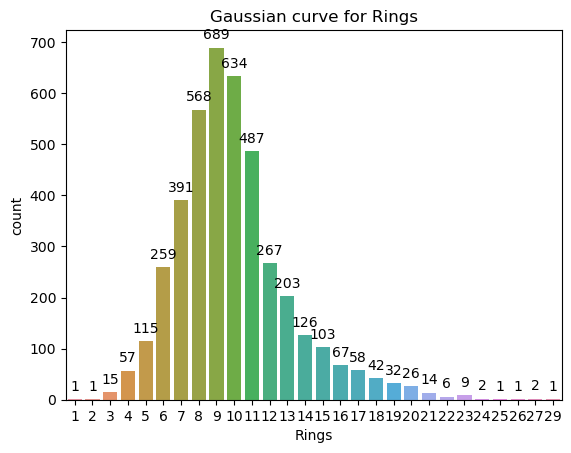

In [15]:
ax = sns.countplot(df['Rings'])
plt.title('Gaussian curve for Rings')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

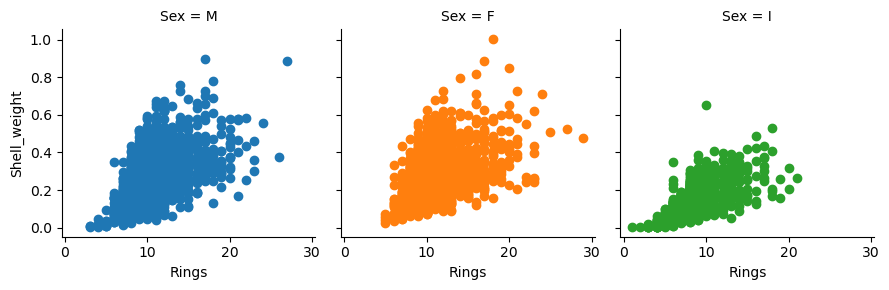

In [16]:
Rings_facet = sns.FacetGrid(df, col="Sex", hue="Sex")
Rings_facet=Rings_facet.map(plt.scatter,"Rings", "Shell_weight")

Text(0, 0.5, 'Shell_weight')

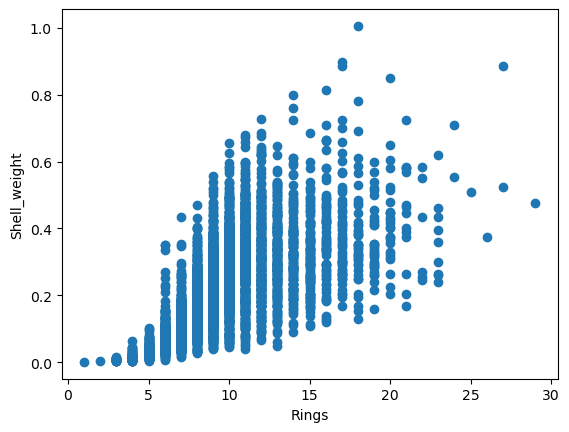

In [17]:
plt.scatter(x=df['Rings'], y=df['Shell_weight'])
plt.xlabel('Rings')
plt.ylabel('Shell_weight')

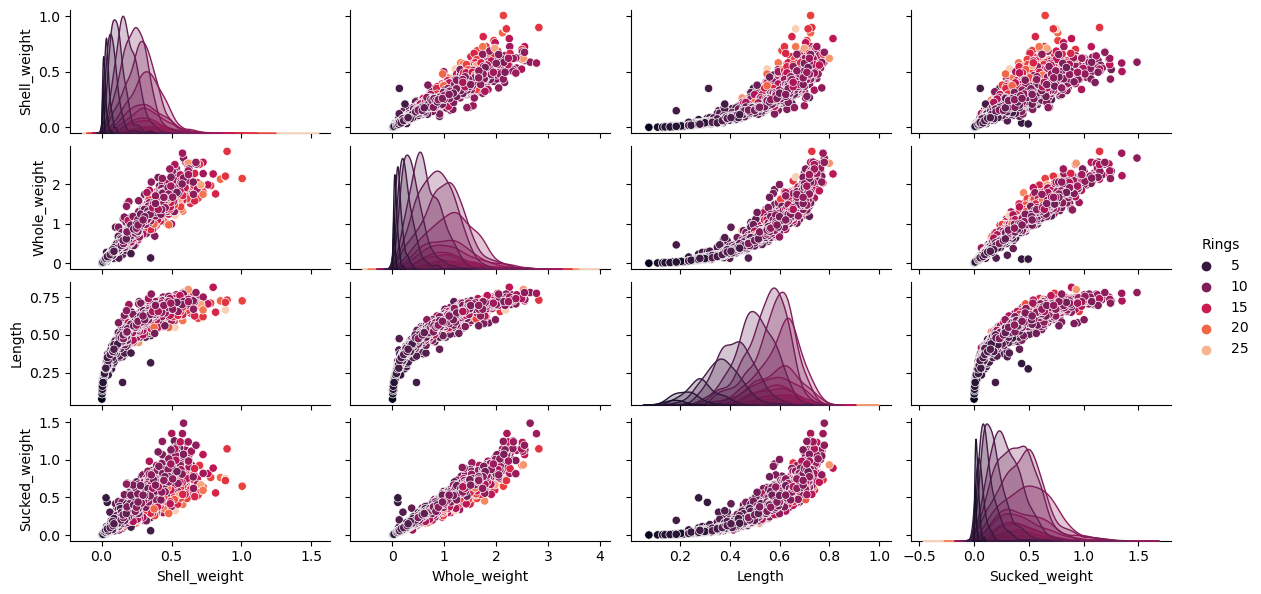

In [18]:
sns.pairplot(df, vars=["Shell_weight", "Whole_weight", "Length", "Sucked_weight"], hue='Rings', palette="rocket", height=1.5, aspect=2)

Text(0, 0.5, 'Feature')

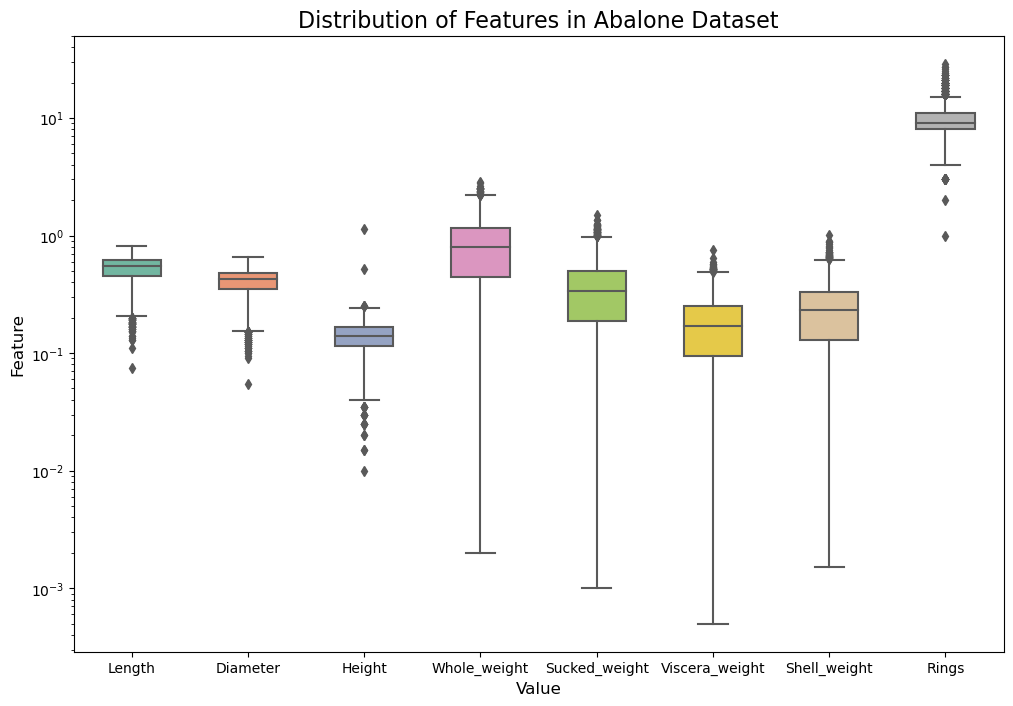

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, orient="v", palette="Set2", whis=1.5, width=0.5)
plt.yscale('log')
plt.title("Distribution of Features in Abalone Dataset", fontsize=16)
plt.xlabel("Value", fontsize=12)
plt.ylabel("Feature", fontsize=12)

Starting Normalization from here

In [20]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
scaler.fit(df[numeric_cols])
abalone_norm = df.copy()
abalone_norm[numeric_cols] = scaler.transform(df[numeric_cols])
print(df.head())


  Sex  Length  Diameter  Height  Whole_weight  Sucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140         0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255         0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770         0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160         0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050         0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [21]:
X = df.drop(['Rings','Sex'], axis=1)
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40) 

X_Norm = abalone_norm.drop(['Rings','Sex'], axis=1)
#y_Norm = abalone_norm['Rings']
y_Norm = y
X_train_Norm, X_test_Norm, y_train_Norm, y_test_Norm = train_test_split(X_Norm, y_Norm, test_size=0.2, random_state = 40) 

In [22]:
display("Training Data Original")
display(X_train.head())
display(X_train.describe())

display("Testing Data Original")
display(X_test.head())
display(X_test.describe())

display("Training Data Z Normalized")
display(X_train_Norm.head())
display(X_train_Norm.describe())

display("Testing Data Z Normalized")
display(X_test_Norm.head())
display(X_test_Norm.describe())

'Training Data Original'

,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
1794,0.575,0.450,0.130,0.8145,0.4030,0.1715,0.2130
1466,0.515,0.425,0.145,0.9365,0.4970,0.1810,0.2185
2275,0.655,0.525,0.185,1.2590,0.4870,0.2215,0.4450
3929,0.650,0.515,0.215,1.4980,0.5640,0.3230,0.4250
1955,0.645,0.510,0.180,1.6195,0.7815,0.3220,0.4675


,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.523590,0.407685,0.139397,0.829025,0.360037,0.180496,0.238490
std,0.120856,0.099806,0.042632,0.493738,0.223379,0.110090,0.139733
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.450000,0.350000,0.115000,0.438500,0.184500,0.092500,0.130000
50%,0.545000,0.425000,0.140000,0.797000,0.336000,0.170500,0.233000
75%,0.615000,0.480000,0.165000,1.153000,0.505500,0.253000,0.326000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


'Testing Data Original'

,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
341,0.62,0.510,0.205,1.3475,0.4775,0.2565,0.480
3413,0.49,0.395,0.120,0.6740,0.3325,0.1235,0.185
1088,0.45,0.340,0.120,0.4925,0.2410,0.1075,0.120
98,0.47,0.370,0.130,0.5225,0.2010,0.1330,0.165
3661,0.55,0.415,0.150,0.7915,0.3535,0.1760,0.236


,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.525598,0.408666,0.139994,0.827610,0.356690,0.180982,0.240193
std,0.117049,0.096998,0.038462,0.477058,0.216322,0.107758,0.137137
min,0.160000,0.110000,0.015000,0.014500,0.005500,0.002500,0.005000
25%,0.453750,0.350000,0.115000,0.451500,0.190500,0.095375,0.130875
50%,0.545000,0.425000,0.140000,0.806000,0.336750,0.171000,0.235000
75%,0.615000,0.481250,0.165000,1.157125,0.492625,0.252875,0.332625
max,0.800000,0.630000,0.240000,2.526000,1.351000,0.590000,0.885000


'Training Data Z Normalized'

,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
1794,0.424788,0.424464,-0.227545,-0.029046,0.196599,-0.082970,-0.185585
1466,-0.074885,0.172519,0.131117,0.219766,0.620144,0.003708,-0.146070
2275,1.091018,1.180300,1.087551,0.877486,0.575086,0.373230,1.481249
3929,1.049379,1.079522,1.804876,1.364912,0.922032,1.299315,1.337556
1955,1.007740,1.029133,0.967997,1.612704,1.902043,1.290191,1.642903


,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,-0.003347,-0.001980,-0.002858,0.000578,0.003019,-0.000887,-0.002449
std,1.006478,1.005828,1.019371,1.006950,1.006500,1.004457,1.003930
min,-3.739154,-3.556267,-3.335953,-1.686092,-1.614731,-1.643173,-1.705134
25%,-0.616198,-0.583316,-0.586208,-0.795876,-0.787917,-0.803766,-0.781909
50%,0.174951,0.172519,0.011563,-0.064736,-0.105289,-0.092094,-0.041893
75%,0.757903,0.726798,0.609334,0.661305,0.658443,0.660635,0.626278
max,2.423480,2.440025,23.683287,4.072271,5.085388,5.286500,5.504642


'Testing Data Z Normalized'

,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
341,0.799543,1.029133,1.565767,1.057976,0.532281,0.692569,1.732711
3413,-0.283082,-0.129815,-0.466653,-0.315588,-0.121059,-0.520922,-0.386755
1088,-0.616198,-0.684094,-0.466653,-0.685746,-0.533340,-0.666906,-0.853756
98,-0.449640,-0.381760,-0.227545,-0.624563,-0.713572,-0.434244,-0.530447
3661,0.216591,0.071741,0.250672,-0.075953,-0.026438,-0.041912,-0.020339


,Length,Diameter,Height,Whole_weight,Sucked_weight,Viscera_weight,Shell_weight
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.013374,0.007911,0.011420,-0.002309,-0.012063,0.003544,0.009788
std,0.974773,0.977526,0.919654,0.972932,0.974702,0.983182,0.985280
min,-3.031284,-3.001988,-2.977291,-1.660599,-1.594455,-1.624925,-1.679988
25%,-0.584968,-0.583316,-0.586208,-0.769363,-0.760882,-0.777534,-0.775623
50%,0.174951,0.172519,0.011563,-0.046381,-0.101910,-0.087532,-0.027523
75%,0.757903,0.739396,0.609334,0.669718,0.600431,0.659495,0.673876
max,2.298562,2.238469,2.402646,3.461458,4.468094,3.735421,4.642486


In [23]:
# Apply KNN classification for original Data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_initial_score = accuracy_score(y_test, knn_pred)
knn_initial_score

0.20334928229665072

In [24]:
# Apply KNN classification for Normalized Data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_Norm, y_train)
knn_pred = knn.predict(X_test_Norm)
knn_initial_score = accuracy_score(y_test, knn_pred)
knn_initial_score

0.215311004784689

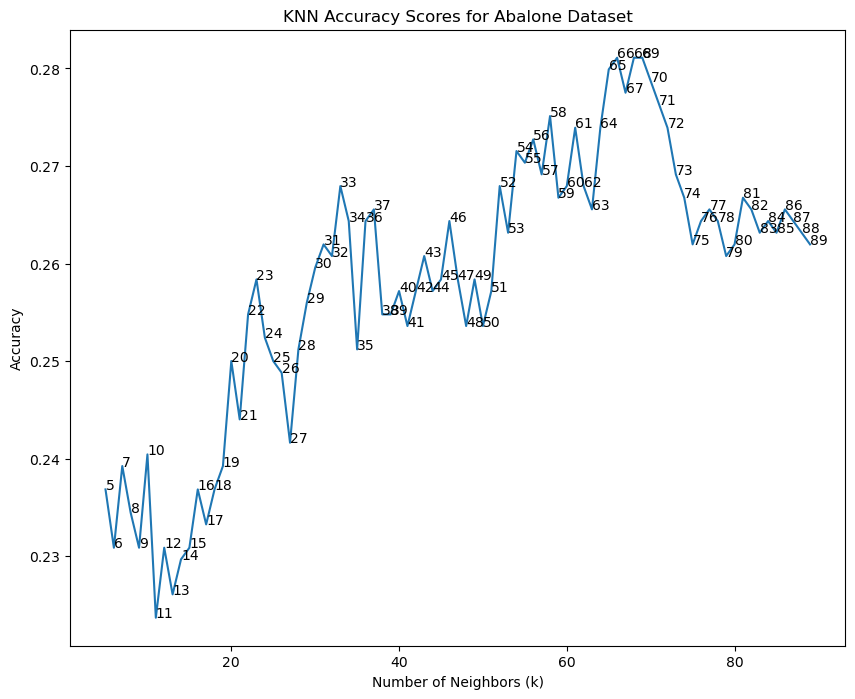

In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
accuracy_score = []
for k in range(5,90):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy_score = recall_score(y_test, knn_pred, average='micro')
    accuracy_score.append(knn_accuracy_score)
    #knn_accuracy_score = accuracy_score(y_test, knn_pred)
    #knn_accuracy_score
    #print("The Accuracy for k={} is {}".format(k, knn_accuracy_score))

plt.figure(figsize=(10,8))
for i, k in enumerate(range(5, 90)):
    plt.text(k, accuracy_score[i], str(k), fontsize=10)
   

plt.plot(range(5,90), accuracy_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Scores for Abalone Dataset')
plt.show()

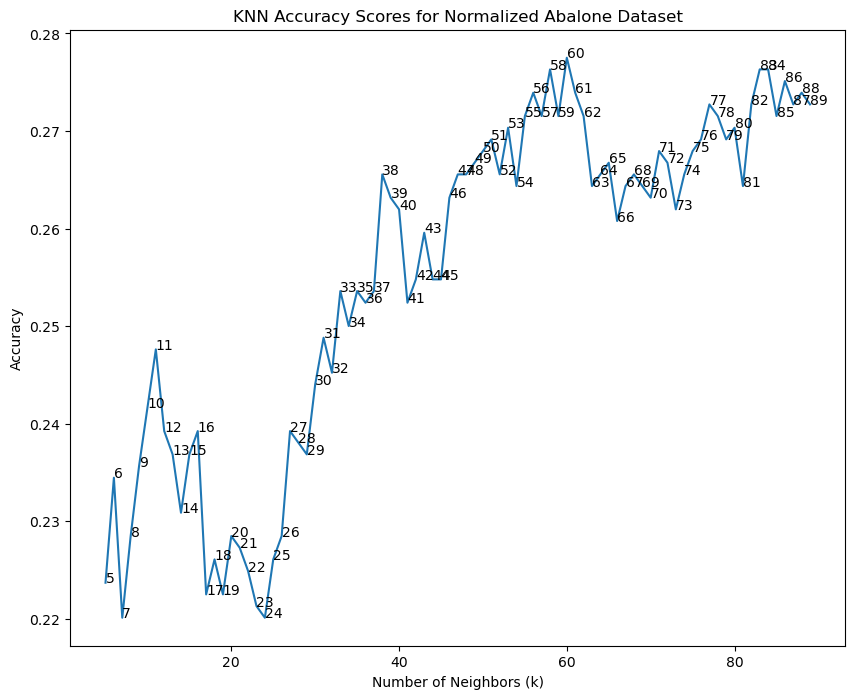

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
accuracy_score = []
for k in range(5,90):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_Norm, y_train)
    knn_pred = knn.predict(X_test_Norm)
    knn_accuracy_score = recall_score(y_test, knn_pred, average='micro')
    accuracy_score.append(knn_accuracy_score)
    #knn_accuracy_score = accuracy_score(y_test, knn_pred)
    #knn_accuracy_score
    #print("The Accuracy for k={} is {}".format(k, knn_accuracy_score))

plt.figure(figsize=(10,8))
plt.plot(range(5,90), accuracy_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Scores for Normalized Abalone Dataset')

for i, k in enumerate(range(5, 90)):
    plt.text(k, accuracy_score[i], str(k), fontsize=10)

plt.show()

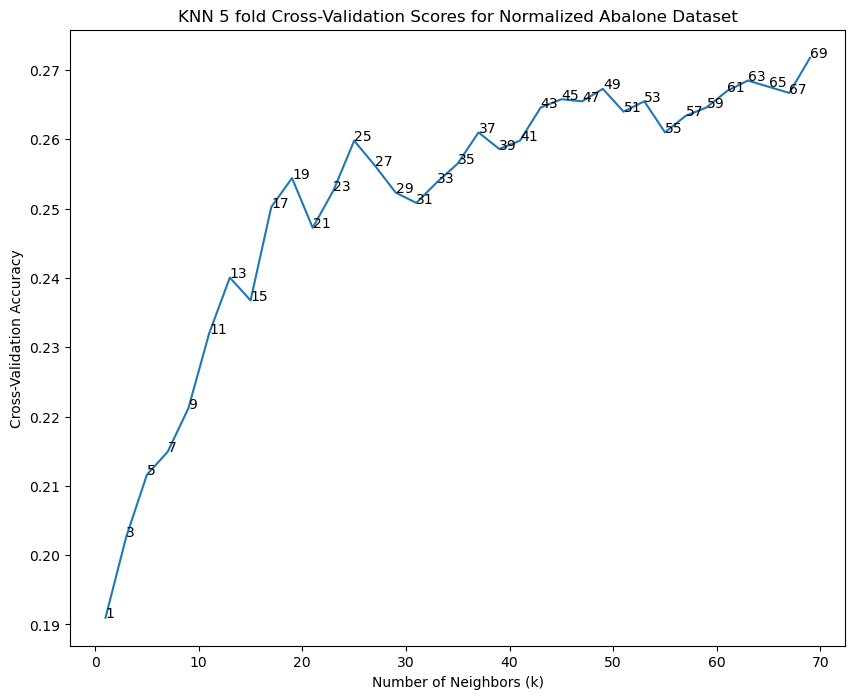

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k_list = np.arange(1, 70, 2)
# Create an empty list to store cross-validation scores
cross_validate_scores = []

# Use 5-fold cross-validation to evaluate model performance for each value of k
cross_validation = 5
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_Norm, y_train, cv=cross_validation, scoring='accuracy')
    cross_validate_scores.append(scores.mean())

# Plot the cross-validation scores for each value of k
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(k_list, cross_validate_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN {} fold Cross-Validation Scores for Normalized Abalone Dataset'.format(cross_validation))

for i, k in enumerate(range(1, 70, 2)):
    plt.text(k, cross_validate_scores[i], str(k), fontsize=10)

plt.show()

[0.19096604996285454, 0.20203807631374024, 0.2152068061187043, 0.21999185485531178, 0.22238706443615014, 0.2322668564216858, 0.23945248516420076, 0.24064964241919745, 0.2406478522775078, 0.2418432193908148, 0.2385533865005415, 0.24723467862481313, 0.24753139460988338, 0.24813064454051537, 0.25052316890881915, 0.25112197130402875, 0.249924814049032, 0.25022421524663674, 0.2544131468005693, 0.2547147856752862, 0.2547147856752862, 0.25920267089140103, 0.2609946027228055, 0.2633902598390663, 0.2630922012477287, 0.25950117701816094, 0.2633916024453335, 0.2624969791358986, 0.2627945901918137, 0.2639917474468104, 0.2618968341344218, 0.2615983280076618, 0.26369324132005045, 0.26399264251765525, 0.2705758885815812]


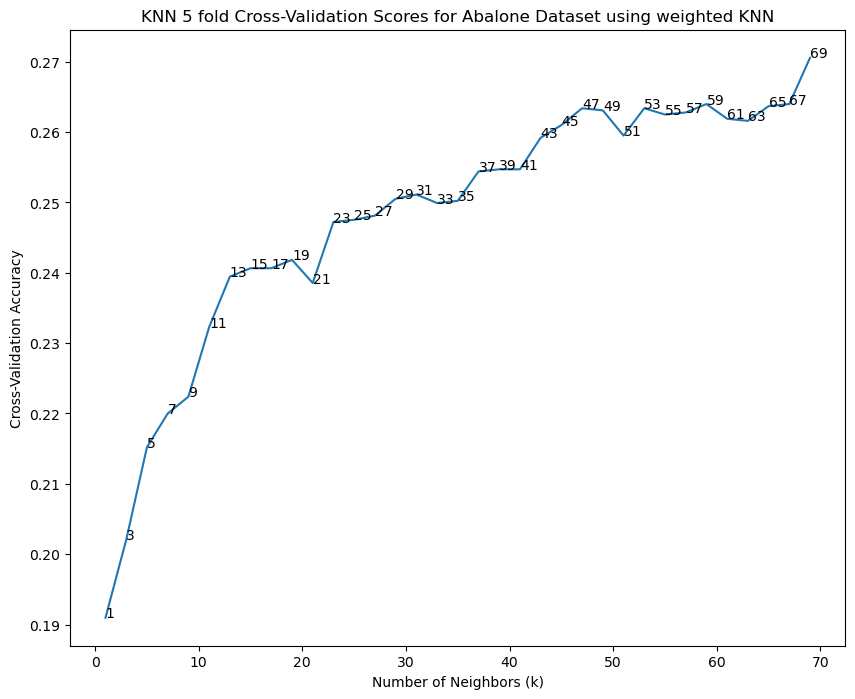

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k_list = np.arange(1, 70, 2)
# Create an empty list to store cross-validation scores
cross_validate_scores = []

# Use 5-fold cross-validation to evaluate model performance for each value of k
cross_validation = 5
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train_Norm, y_train, cv=cross_validation, scoring='accuracy')
    cross_validate_scores.append(scores.mean())

# Plot the cross-validation scores for each value of k
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(k_list, cross_validate_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN {} fold Cross-Validation Scores for Abalone Dataset using weighted KNN'.format(cross_validation))

print(cross_validate_scores)

for i, k in enumerate(range(1, 70, 2)):
    plt.text(k, cross_validate_scores[i], str(k), fontsize=10)

plt.show()

## Assignment 2 Question 1 implementation starts here
### Question 1
1 Representation Learning
You will apply PCA and LDA onto the dataset, analyse the resulting new representations in terms
of interpretability and classifier impact, then create new reduced dimension datasets for use in later
questions.
1. Run PCA on each dataset, look at the total variance explained by the principle components.
At least, show a plot of the first two principle components using easily distinguishable colours
and markers to indicate the labels of each datapoint.
2. Plot and show a scree-plot to look at the cumulative variance represented by the PCA
eigenvectors.
3. You now want to experimentally find the best reduced dimensionality for the dataset with
respect to how it impacts the accuracy of a classifier.
• Produce a plot that shows accuracy of the kNN classifier on the PCA features using
different numbers of dimensions. The accuracy should be listed in increasing order from
2 up to D, the original dimensionality of the dataset.
• For the kNN classifier, you should choose the best one you found from asg1, one of the
weighted versions using a normalized dataset.
• Comment briefly on the difference in accuracy from asg1.
• How do the best number of features suggested by the scree plot and this analysis compare?
4. Try using the t-SNE method to visualize the datasets by producing a 2D plot, comment on
any useful patterns that this shows.
Once you’ve completed the above analysis, you can create two new versions of your datasets
using the best reduced dimensionality representation, as measured against kNN performance or the
scree plot analysis, whichever you choose. For the rest of the assignment you will have the following
datasets
Original Dataset Feature Extraction Datasets
wine-raw wine-pca / wine-lda
abalone-raw abalone-pca / abalone-lda
Include summary accuracy scores for kNN on all six datasets in the table in the last question.

# Using Abalone Dataset

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sys

df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')
X = df.iloc[:, 1:8].values  # extract features
y = df.iloc[:, -1].values   # extract labels
print(y)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

cov_mat = np.cov(X_std.T)
print("Covariance Matrix Calculated using numpy:\n")
np.savetxt(sys.stdout, cov_mat, fmt='%.4f', delimiter='\t')

[15  7  9 ...  9 10 12]
Covariance Matrix Calculated using numpy:

1.0002	0.9870	0.8278	0.9255	0.8981	0.9032	0.8979
0.9870	1.0002	0.8339	0.9257	0.8934	0.8999	0.9055
0.8278	0.8339	1.0002	0.8194	0.7752	0.7985	0.8175
0.9255	0.9257	0.8194	1.0002	0.9696	0.9666	0.9556
0.8981	0.8934	0.7752	0.9696	1.0002	0.9322	0.8828
0.9032	0.8999	0.7985	0.9666	0.9322	1.0002	0.9079
0.8979	0.9055	0.8175	0.9556	0.8828	0.9079	1.0002


In the above we block, we calculated the covariance matrix in order to find the similarity between two feature variables.instead of using Direct PCA, we calculated it using numpy array to study the data. We can see that the feature points are quite correlated with each other. 
1. The diagonal elements are the variances of each variable, which represent the spread or variability of each variable around its mean.
2. The off-diagonal elements are the covariances between each pair of variables, which represent the degree to which the variables vary together.
3. The covariance matrix shows that the length and diameter of abalone have a high positive covariance, indicating that they tend to vary together. Similarly, the weight measurements have a positive covariance with each other.
4. The covariance matrix also shows that the height of abalone has a low covariance with the other variables, indicating that it is less related to the other variables.

## Using PCA as a preprocessing step for abalone dataset

Variance explained by each principal component:
 [0.9078731478516083, 0.03991890899342265, 0.023906381975154992, 0.016295977883821613, 0.009236274060776192, 0.0018182993981407179, 0.0009510098370754434]
Cumulative variance explained by each principal component:
 [0.90787315 0.94779206 0.97169844 0.98799442 0.99723069 0.99904899
 1.        ]
Number of principal components needed to explain 95% of the variance: 3


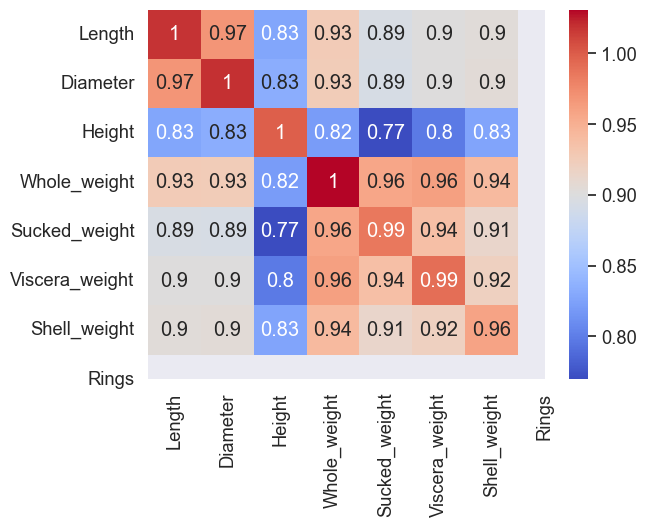

Covariance matrix of the principal components:
1.0177	0.9687	0.8271	0.9262	0.8949	0.9011	0.9041
0.9687	1.0189	0.8335	0.9257	0.8937	0.9005	0.9046
0.8271	0.8335	0.9985	0.8199	0.7696	0.7973	0.8264
0.9262	0.9257	0.8199	1.0310	0.9568	0.9610	0.9412
0.8949	0.8937	0.7696	0.9568	0.9858	0.9376	0.9129
0.9011	0.9005	0.7973	0.9610	0.9376	0.9909	0.9203
0.9041	0.9046	0.8264	0.9412	0.9129	0.9203	0.9590


Eigenvalues of the principal components:
6.3566
0.2795
0.1674


Eigenvectors of the principal components:
0.3833	0.3836	0.3481	0.3907	0.3782	0.3815	0.3789
0.0379	0.0653	0.8668	-0.2333	-0.3480	-0.2529	-0.0584
-0.5933	-0.5854	0.3149	0.2308	0.2316	0.2703	0.1621




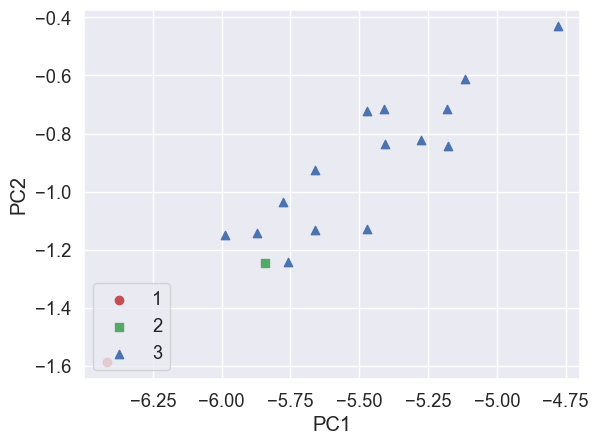

In [30]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

tot = sum(eig_vals)
var_exp = [(i / tot) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance explained by each principal component:\n", var_exp)
print("Cumulative variance explained by each principal component:\n", cum_var_exp)

# Calculate the number of principal components needed to explain 95% of the variance
n_components = np.argmax(cum_var_exp >= 0.95) + 1
print("Number of principal components needed to explain 95% of the variance:", n_components)

pca = PCA(n_components=n_components)
#pca = PCA(n_components=np.argmax(cum_var_exp)+1)
X_pca = pca.fit_transform(X_std)

covariance = pca.get_covariance()
eigen_values = pca.explained_variance_
eigen_vectors = pca.components_

plt.figure()
sns.set(font_scale=1.2)
sns.heatmap(covariance, xticklabels=features.columns, yticklabels=features.columns, cmap="coolwarm", annot=True)
plt.show()

print("Covariance matrix of the principal components:")
np.savetxt(sys.stdout, covariance, fmt='%.4f', delimiter='\t')
print("\n")
print("Eigenvalues of the principal components:")
np.savetxt(sys.stdout, eigen_values, fmt='%.4f', delimiter='\t')
print("\n")
print("Eigenvectors of the principal components:")
np.savetxt(sys.stdout, eigen_vectors, fmt='%.4f', delimiter='\t')
print("\n")

colors = ['r', 'g', 'b']
markers = ['o', 's', '^']
for label, color, marker in zip(np.unique(y), colors, markers):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], color=color, marker=marker, label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()


from the eigen values, we can see that the first principal components captures most variance. 

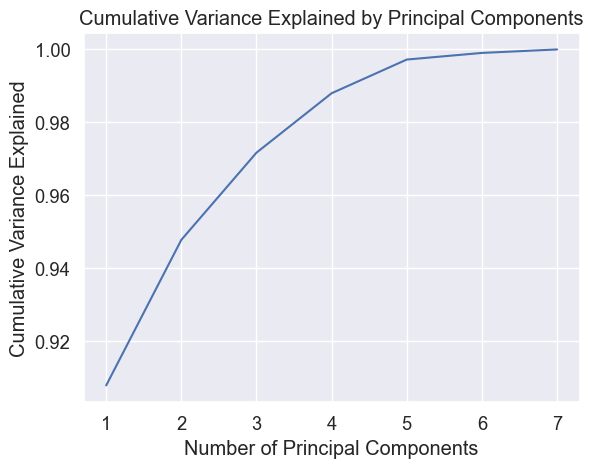

In [31]:
# Plot the cumulative variance explained
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.show()

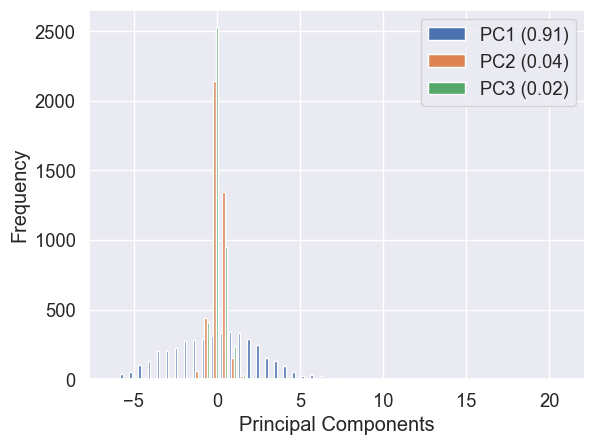

In [32]:
n_components = pca.n_components_
plt.hist(X_pca, bins=50, label=[f'PC{i+1} ({var:.2f})' for i,var in enumerate(pca.explained_variance_ratio_)])
plt.xlabel('Principal Components')
plt.ylabel('Frequency')
plt.legend()
plt.show()

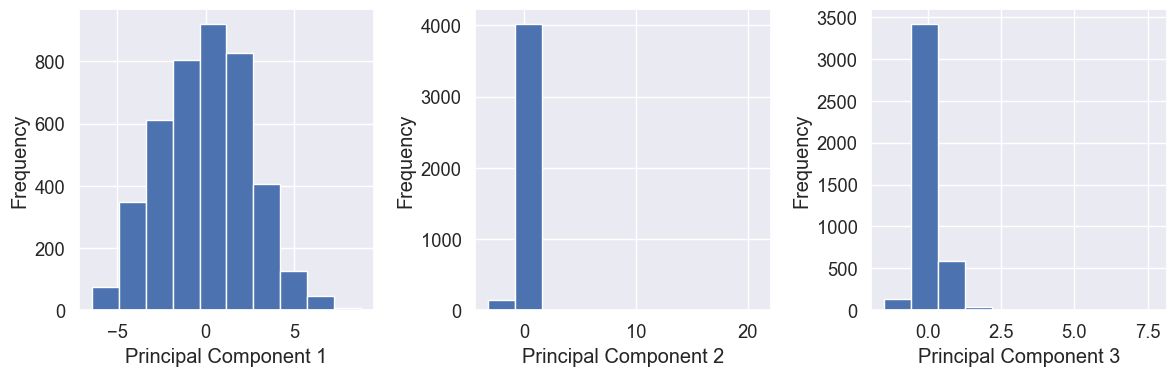

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axs[i].hist(X_pca[:, i], bins=10)
    axs[i].set_xlabel(f"Principal Component {i+1}")
    axs[i].set_ylabel("Frequency")
fig.tight_layout()
plt.show()

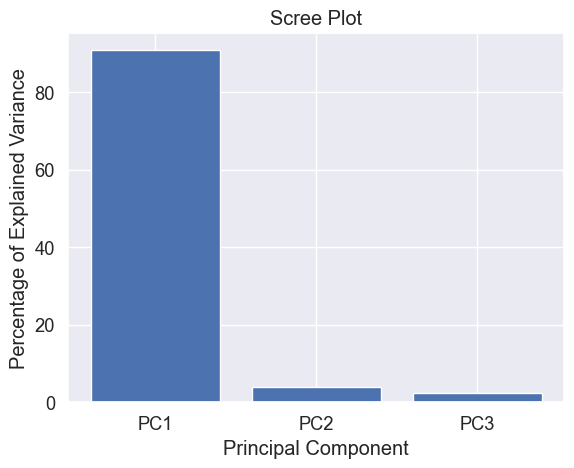

In [34]:
# plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-', linewidth=2)
# plt.xlabel('Principal Component')
# plt.ylabel('Proportion of Variance Explained')
# plt.title('Scree Plot')
# for i, explained_var in enumerate(pca.explained_variance_ratio_):
#     plt.text(i + 1, explained_var + 0.01, f'PC{i+1}', ha='center')
# plt.show()

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

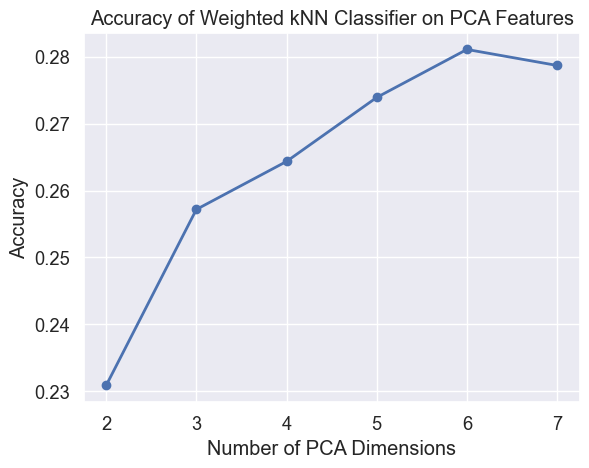

In [35]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

dims = np.arange(2, X.shape[1]+1)
accs = []
for d in dims:
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=68, weights='distance')
    knn.fit(X_train_pca, y_train)
    acc = knn.score(X_test_pca, y_test)
    accs.append(acc)

import matplotlib.pyplot as plt
plt.plot(dims, accs, 'bo-', linewidth=2)
plt.xlabel('Number of PCA Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy of Weighted kNN Classifier on PCA Features')
plt.grid(True)
plt.show()

In [36]:
#Printing Accuracy for abalone using 3 PC and K=68
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Apply PCA and select the first 3 principal components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply weighted KNN with k=68 and weights=distance
knn = KNeighborsClassifier(n_neighbors=68, weights='distance')
knn.fit(X_train_pca, y_train)

# Evaluate the model
accuracy = knn.score(X_test_pca, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.25717703349282295


## Using LDA as a preprocessing step for abalone dataset

In [37]:
#Implementing LDA and calculating accuracy using KNN k=68
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
dataset = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')



# Prepare the dataset
X = dataset.iloc[:, 1:8].values
y = dataset.iloc[:, -1].values
y = pd.cut(y, bins=[0, 8, 11, 30], labels=['young', 'middle-aged', 'old'])

print(y)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

# Perform LDA with cross-validation
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X_train, y_train, cv=5)
print("Mean cv accuracy:", scores.mean())

# Project the training and test sets onto the LDA projection
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Apply KNN with k=68
knn = KNeighborsClassifier(n_neighbors=68, weights='distance')
knn.fit(X_train_lda, y_train)

# Evaluate the model
accuracy = knn.score(X_test_lda, y_test)
print("Test Accuracy:", accuracy)

accuracy_scores = cross_val_score(lda, X_train_lda, y_train, cv=5)

print("CV Accuracy scores:", accuracy_scores)
print("CV Average accuracy:", accuracy_scores.mean())

['old', 'young', 'middle-aged', 'middle-aged', 'young', ..., 'middle-aged', 'middle-aged', 'middle-aged', 'middle-aged', 'old']
Length: 4177
Categories (3, object): ['young' < 'middle-aged' < 'old']
Mean cv accuracy: 0.6692637147230204
Test Accuracy: 0.6961722488038278
CV Accuracy scores: [0.66367713 0.68263473 0.69011976 0.67215569 0.65568862]
CV Average accuracy: 0.6728551864880105


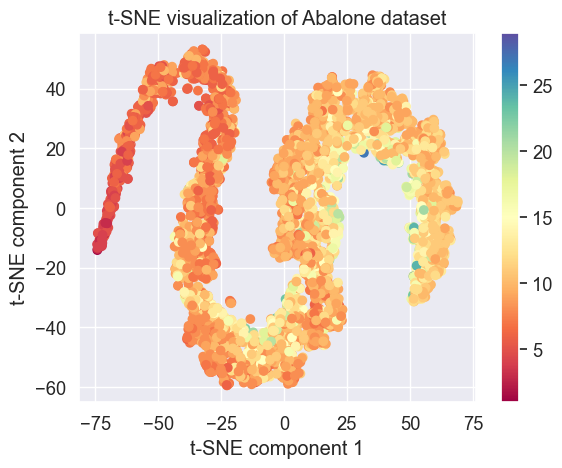

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

X = df.iloc[:, 1:8].values
y = df.iloc[:, -1].values

tsne = TSNE(n_components=2, perplexity=30.0, random_state=0)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap=plt.cm.Spectral)
plt.colorbar()
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('t-SNE visualization of Abalone dataset')
plt.show()

1. The t-SNE plot shows the abalone samples projected onto a two-dimensional space based on their similarity in the original high-dimensional space.
2. Each point in the plot represents an abalone sample, and the color of the point corresponds to the number of rings in the abalone (an indicator of age).
3. The t-SNE plot reveals that the abalone samples with similar numbers of rings tend to cluster together, indicating that age is an important factor in the variability of the data.
4. The plot also shows that the length and diameter measurements of the abalone are strongly correlated, as points that are close together in the plot tend to have similar values for these variables.
5. There is some overlap between the clusters corresponding to different numbers of rings, indicating that other variables in the dataset also contribute to the variability of the data.
6. Overall, the t-SNE visualization provides an intuitive way to explore the structure of the abalone dataset and can reveal interesting patterns and relationships between the variables.

## Using Wine Dataset

In [39]:
wine_r = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-red.csv", sep=';')
wine_r["colour"]=1
wine_w = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-white.csv", sep=';')
wine_w["colour"]=0
D = pd.concat([wine_w,wine_r], ignore_index=True)

import warnings
warnings.filterwarnings('ignore')
D

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [40]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  colour                6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [41]:
D.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


There are no missing values, so now we can start with EDA. More samples of quality 5 or 6 have been observed in the dataset, which shows that it is not a balanced dataset. The standard deviation for most features vary over a range and hence, we require normalization of the features before applying PCA.

In [42]:
D.shape

(6497, 13)

Most of the wines in this dataset has a quality score of 5 or 6. We will now add a feature called 'rating' depending on the quality score of each wine data point. If quality is <5, we assign them as 'Bad' (value of 0) and if quality is >=5, we assign it as 'Good' (value of 1).

In [43]:
rating=[]
for i in D["quality"]:
    if i <= 6:
        rating.append(0)
    else:
        rating.append(1)

D["Ratings"] =  rating
D

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour,Ratings
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


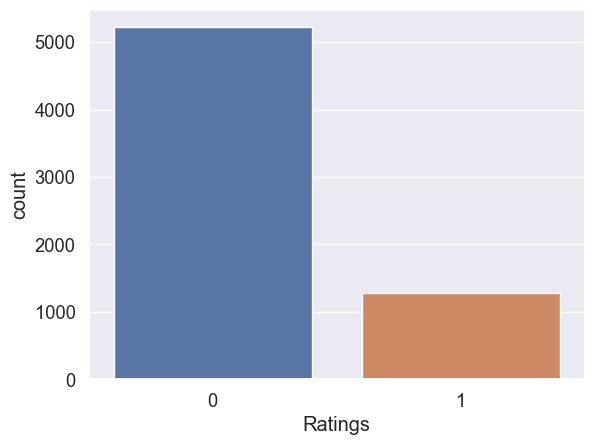

In [44]:
sns.countplot(D['Ratings'])
plt.show()

Almost 5200 of the total number of wines seem to be "Bad" and the remaining 1297 wines "Good".

In [45]:
#Data Summarization
wine_describe = D.describe()
print(wine_describe)

summarize = pd.DataFrame(columns=['mean', 'median','variance','skew','kurtosis'])
summarize['mean'] = D.mean()
summarize['median'] = D.median()
summarize['variance'] = D.var()
summarize['skew'] = D.skew()
summarize['kurtosis'] = D.kurtosis()
display(summarize)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

,mean,median,variance,skew,kurtosis
fixed acidity,7.215307,7.00000,1.680740,1.723290,5.061161
volatile acidity,0.339666,0.29000,0.027105,1.495097,2.825372
citric acid,0.318633,0.31000,0.021117,0.471731,2.397239
residual sugar,5.443235,3.00000,22.636696,1.435404,4.359272
chlorides,0.056034,0.04700,0.001227,5.399828,50.898051
free sulfur dioxide,30.525319,29.00000,315.041192,1.220066,7.906238
total sulfur dioxide,115.744574,118.00000,3194.720039,-0.001177,-0.371664
density,0.994697,0.99489,0.000009,0.503602,6.606067
pH,3.218501,3.21000,0.025853,0.386839,0.367657
sulphates,0.531268,0.51000,0.022143,1.797270,8.653699


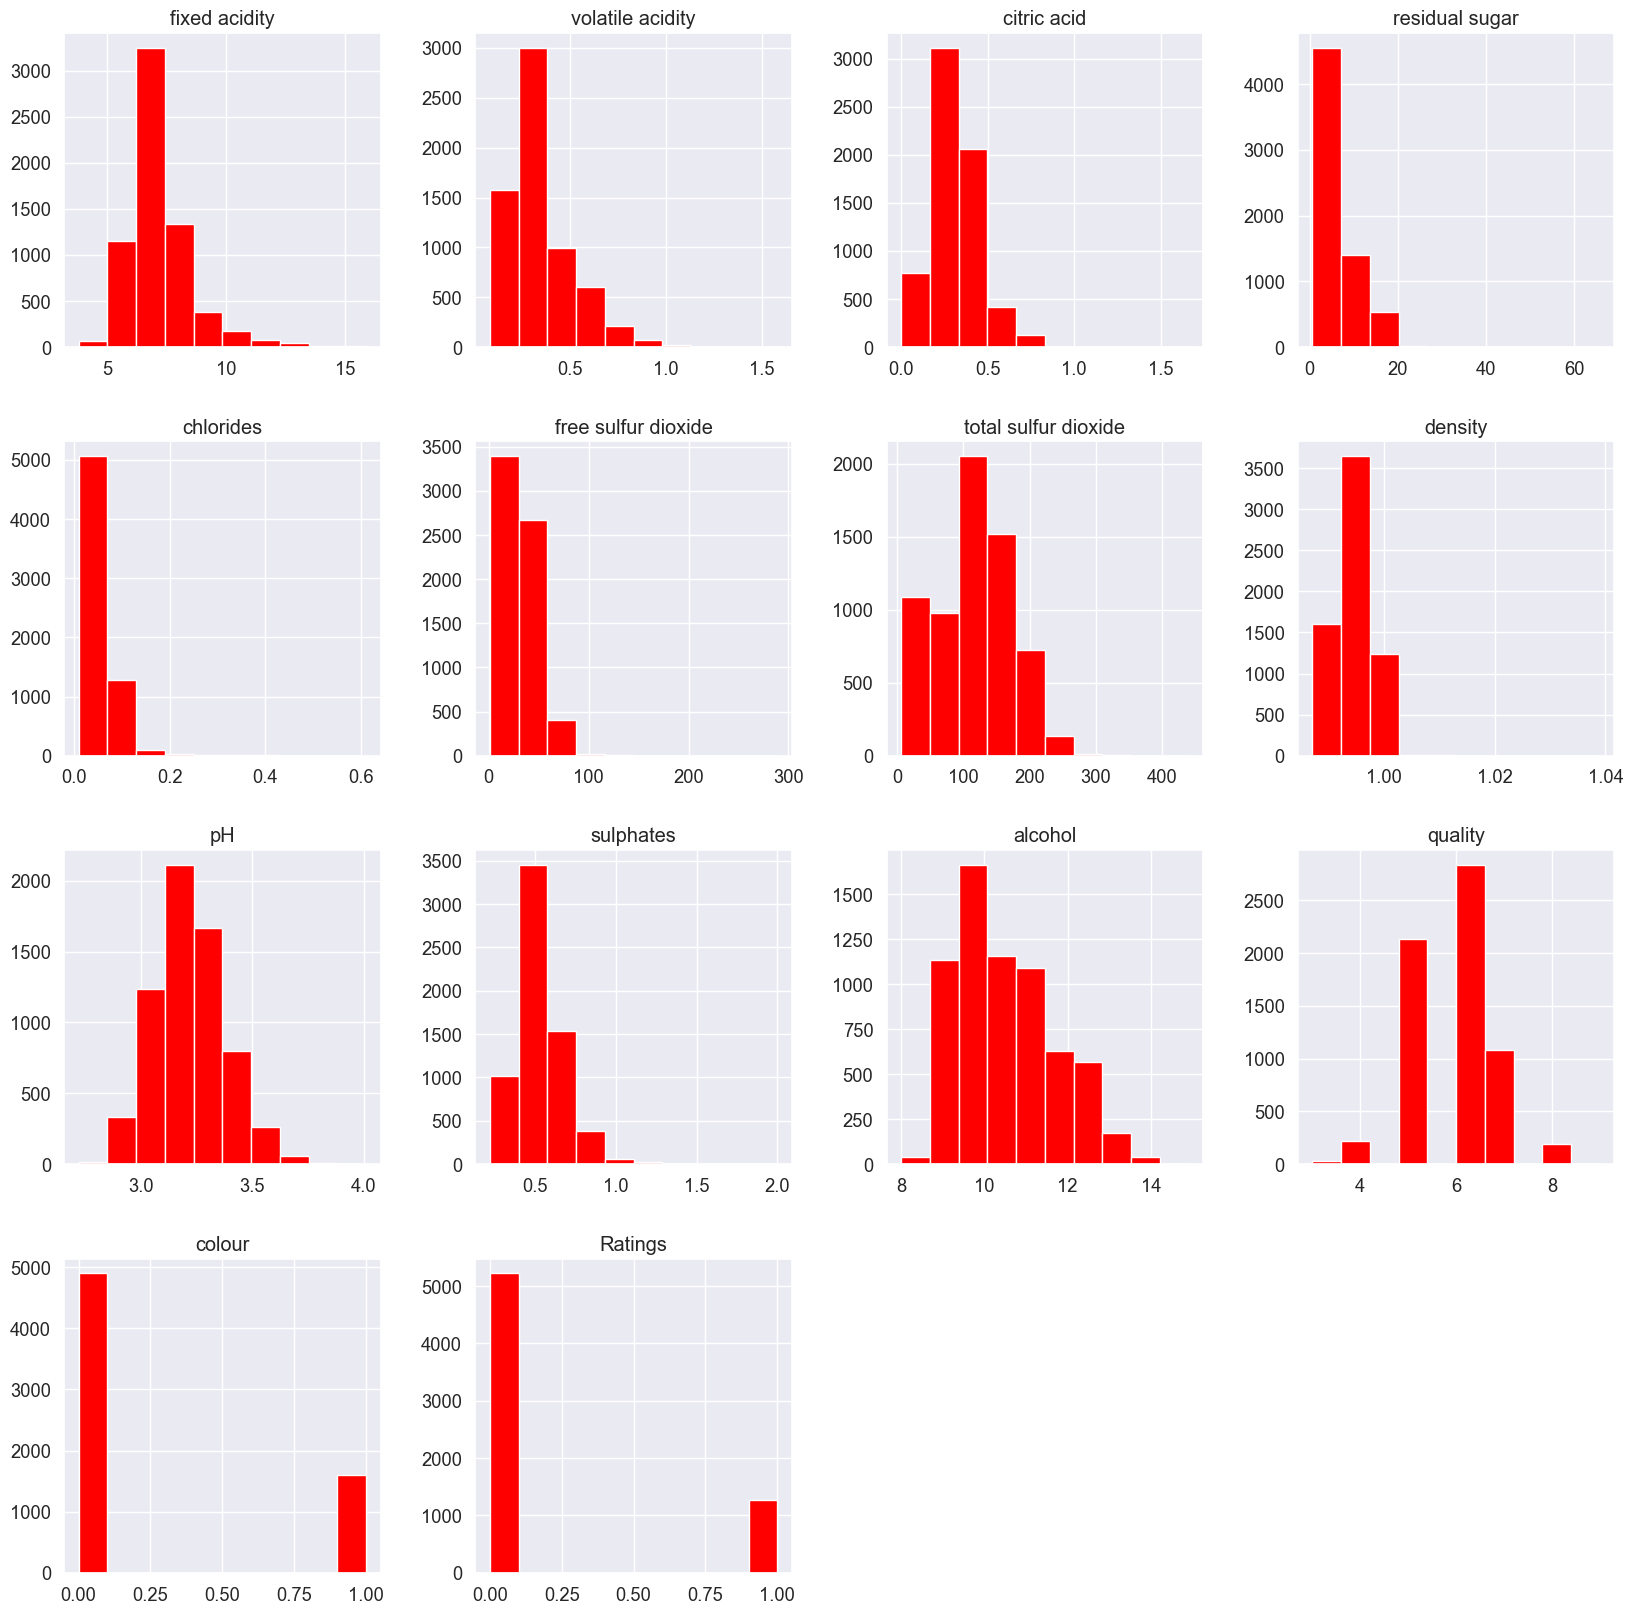

In [46]:
D.hist(figsize=(20,20), color='red')
plt.show()

<AxesSubplot:>

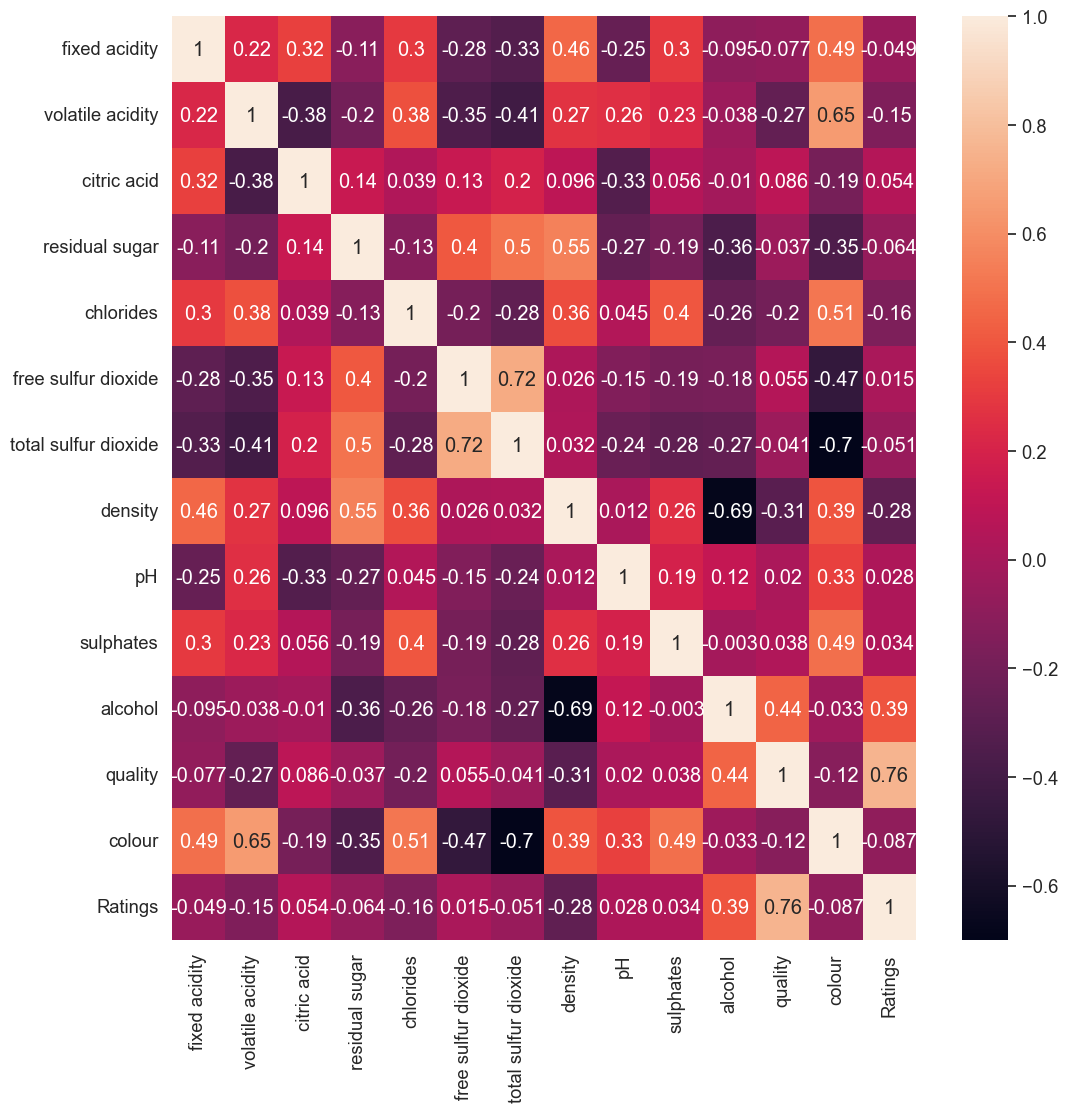

In [47]:
mycor= D.corr()
plt.subplots(figsize=(12,12)) 
sns.heatmap(mycor,annot=True)

Alcohol has the maximum correlation with quality followed by sulphates and citric acid and then fixed acidity. We can also observe that residual sugar has a significant positive correlation with density and total sulfur dioxide is strongly correlated with the type of wine.

Apply Z-score Normalization on wine dataset:

In [48]:
#Split dataset into X and Y
X = D.iloc[:, :-1]
y = D.iloc[:, -3]
print(y)
sc_wine = StandardScaler()
X = sc_wine.fit_transform(X)
print("The normalized dataset is: \n", X)

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64
The normalized dataset is: 
 [[-0.16608919 -0.42318303  0.28468605 ... -1.41855821  0.20799905
  -0.57136659]
 [-0.70607349 -0.24094936  0.14704613 ... -0.83161516  0.20799905
  -0.57136659]
 [ 0.68245757 -0.36243847  0.55996589 ... -0.32852111  0.20799905
  -0.57136659]
 ...
 [-0.70607349  1.03468634 -1.29817304 ...  0.42611996  0.20799905
   1.75018984]
 [-1.01463595  1.85473786 -1.366993   ... -0.2446721  -0.93722961
   1.75018984]
 [-0.93749534 -0.1802048   1.04170561 ...  0.42611996  0.20799905
   1.75018984]]


In [49]:
cov_mat = np.cov(X.T)
print("Covariance Matrix Calculated using numpy:\n")
np.savetxt(sys.stdout, cov_mat, fmt='%.4f', delimiter='\t')

Covariance Matrix Calculated using numpy:

1.0002	0.2190	0.3245	-0.1120	0.2982	-0.2828	-0.3291	0.4590	-0.2527	0.2996	-0.0955	-0.0768	0.4868
0.2190	1.0002	-0.3780	-0.1960	0.3772	-0.3526	-0.4145	0.2713	0.2615	0.2260	-0.0376	-0.2657	0.6531
0.3245	-0.3780	1.0002	0.1425	0.0390	0.1331	0.1953	0.0962	-0.3299	0.0562	-0.0105	0.0855	-0.1874
-0.1120	-0.1960	0.1425	1.0002	-0.1290	0.4029	0.4956	0.5526	-0.2674	-0.1860	-0.3595	-0.0370	-0.3489
0.2982	0.3772	0.0390	-0.1290	1.0002	-0.1951	-0.2797	0.3627	0.0447	0.3957	-0.2570	-0.2007	0.5128
-0.2828	-0.3526	0.1331	0.4029	-0.1951	1.0002	0.7210	0.0257	-0.1459	-0.1885	-0.1799	0.0555	-0.4717
-0.3291	-0.4145	0.1953	0.4956	-0.2797	0.7210	1.0002	0.0324	-0.2384	-0.2758	-0.2658	-0.0414	-0.7005
0.4590	0.2713	0.0962	0.5526	0.3627	0.0257	0.0324	1.0002	0.0117	0.2595	-0.6869	-0.3059	0.3907
-0.2527	0.2615	-0.3299	-0.2674	0.0447	-0.1459	-0.2384	0.0117	1.0002	0.1922	0.1213	0.0195	0.3292
0.2996	0.2260	0.0562	-0.1860	0.3957	-0.1885	-0.2758	0.2595	0.1922	1.0002	-0.0030	0.0385

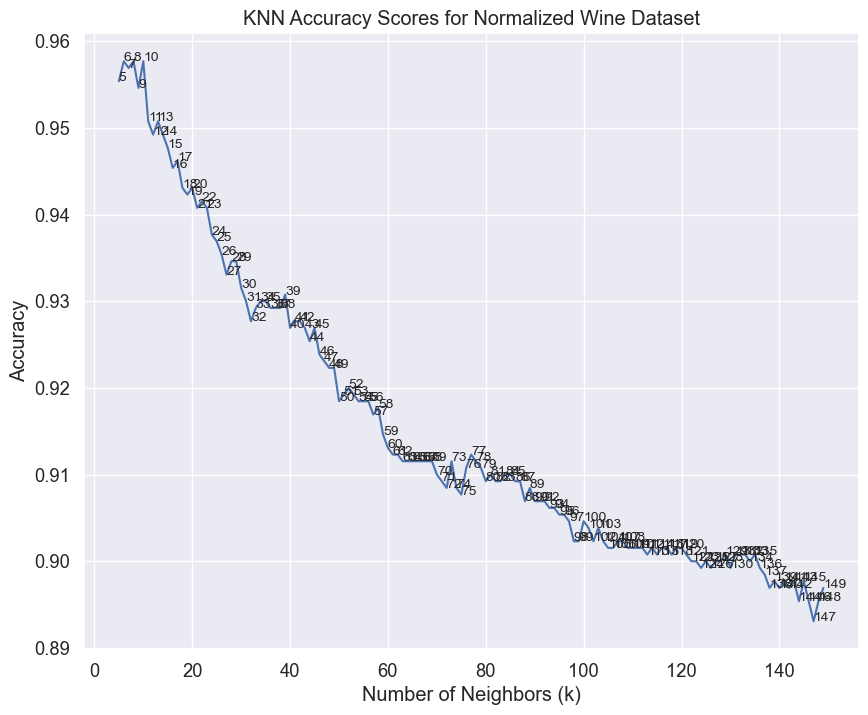

In [50]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
accuracy_score = []
for k in range(5,150):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracy_score = recall_score(y_test, knn_pred, average='micro')
    accuracy_score.append(knn_accuracy_score)
    #knn_accuracy_score = accuracy_score(y_test, knn_pred)
    #knn_accuracy_score
    #print("The Accuracy for k={} is {}".format(k, knn_accuracy_score))

plt.figure(figsize=(10,8))
plt.plot(range(5,150), accuracy_score)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy Scores for Normalized Wine Dataset')

for i, k in enumerate(range(5, 150)):
    plt.text(k, accuracy_score[i], str(k), fontsize=10)

plt.show()

from the above graph, we have selected value of K = 40 as the accuracy is decreasing when K is inreasing. so we chosed the middle value i.e. K=40

In [51]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

# Apply KNN with K=40 and weights=distance
knn = KNeighborsClassifier(n_neighbors=40, weights='distance')
knn.fit(X_train, y_train)

#Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)

cv_accuracy_scores = cross_val_score(knn, X, y, cv=5)
# Print the accuracy scores
print("CV Accuracy scores:", accuracy_scores)
print("CV Average accuracy:", accuracy_scores.mean())


Test Accuracy: 0.9176923076923077
CV Accuracy scores: [0.66367713 0.68263473 0.69011976 0.67215569 0.65568862]
CV Average accuracy: 0.6728551864880105


The above accuracy is for raw wine dataset with only normalization done as a pre-processing step

## PCA preprocessing on Wine dataset

In [52]:
''' Using Principal Component Analysis or PCA in short to reduce the dimensionality of the data in order to optimize the result 
of the clustering. '''
pca = PCA()
principalComponents = pca.fit_transform(X)
principalComponents

array([[-2.06707183,  3.48606943, -0.12160483, ...,  0.355487  ,
         0.09523024,  0.03915981],
       [-0.27234588, -0.50787251, -0.41460196, ..., -0.14436514,
         0.04905848,  0.16266364],
       [-0.38931517,  0.29383078,  0.53340294, ..., -0.20948338,
        -0.65935401, -0.18165748],
       ...,
       [ 2.720703  , -0.90429614, -1.28925071, ...,  0.71079279,
         0.17217269,  0.25399957],
       [ 3.05387095, -0.52363091, -2.62264968, ...,  0.87445042,
        -0.15998844, -0.06881234],
       [ 1.79287529, -0.72259628,  0.31706237, ...,  1.30046828,
         0.76258543,  0.16620553]])

In [53]:
PCA_dataset = pd.DataFrame(data = principalComponents, columns = ['component1', 'component2', 'component3', 'component4', 
                                                                  'component5', 'component6','component7', 'component8', 'component9',
                                                                 'component10', 'component11', 'component12', 'component13'] )
PCA_dataset.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component9,component10,component11,component12,component13
0,-2.067072,3.486069,-0.121605,0.225732,1.926477,0.354486,-0.672678,0.121818,0.495242,0.164076,0.355487,0.095230,0.039160
1,-0.272346,-0.507873,-0.414602,-0.251146,-0.448951,-0.855633,-0.837531,-0.026002,-0.358875,-1.135174,-0.144365,0.049058,0.162664
2,-0.389315,0.293831,0.533403,-0.253599,0.420879,-0.646033,-0.108228,-0.519626,-0.328810,0.029797,-0.209483,-0.659354,-0.181657
3,-1.708927,0.968794,-0.219406,0.149823,0.055460,0.226626,-0.012470,-0.479977,-0.543434,0.084188,-0.458196,0.232972,-0.046354
4,-1.708927,0.968794,-0.219406,0.149823,0.055460,0.226626,-0.012470,-0.479977,-0.543434,0.084188,-0.458196,0.232972,-0.046354


In [54]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.29492412, 0.20484445, 0.12627433, 0.08311596, 0.06536559,
       0.05083677, 0.04407412, 0.04007519, 0.03618948, 0.02352702,
       0.01975193, 0.00917425, 0.00184679])

In [55]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 29.49,  49.97,  62.6 ,  70.91,  77.45,  82.53,  86.94,  90.95,
        94.57,  96.92,  98.9 ,  99.82, 100.  ])

In [56]:
pca.components_

array([[ 0.26022761,  0.36378537, -0.11319392, -0.23277398,  0.30248902,
        -0.33871316, -0.40228457,  0.16134445,  0.17486612,  0.27953014,
        -0.00438771, -0.09658937,  0.46988304],
       [ 0.21697768,  0.04063327,  0.1652622 ,  0.38999091,  0.21461462,
         0.18038247,  0.21801564,  0.53387129, -0.18258784,  0.06996466,
        -0.49463822, -0.27584039,  0.04159581],
       [ 0.46915601, -0.27753553,  0.58755451, -0.07691544,  0.04901716,
        -0.10171768, -0.10349402, -0.05064624, -0.40644534,  0.17017062,
         0.21223488,  0.29407328, -0.00515413],
       [-0.15221794, -0.0988973 ,  0.05585934,  0.1409448 ,  0.11802731,
         0.33598581,  0.15119611,  0.14728961,  0.45593175,  0.54443786,
         0.0924771 ,  0.49999028,  0.09931403],
       [ 0.16420616,  0.13567635, -0.22703334,  0.50195548, -0.4279513 ,
        -0.21043504, -0.20327797,  0.30757457, -0.03611788, -0.25574119,
         0.12151437,  0.44307302,  0.09994023],
       [-0.02600784,  0.382496

Text(0.5, 1.0, 'cumulative PCA variance plot for wine dataset')

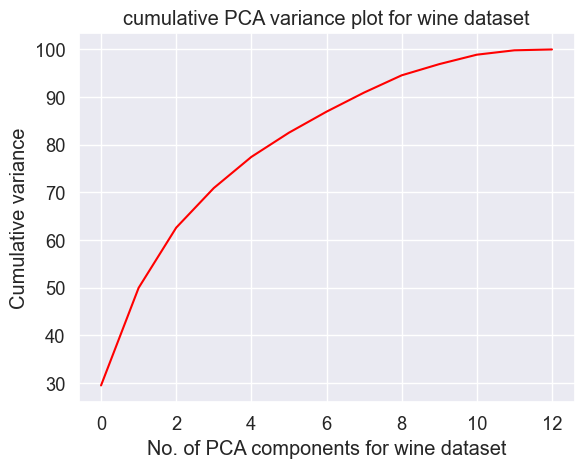

In [157]:
# Variance plot for PCA components obtained 
import matplotlib.pyplot as plt
plt.plot(var1,color="red")
plt.xlabel("No. of PCA components for wine dataset")
plt.ylabel("Cumulative variance")
plt.title("cumulative PCA variance plot for wine dataset")

Our problem suggests to use the first 3 principal components.

In [58]:
principal_component1 = PCA_dataset['component1']
principal_component2 = PCA_dataset['component2']
principal_component3 = PCA_dataset['component3']

In [59]:
# Creating dataframe for further clusering algorithms
pca_df = pd.concat([principal_component1, principal_component2, principal_component3], axis = 1)
pca_df.head()

,component1,component2,component3
0,-2.067072,3.486069,-0.121605
1,-0.272346,-0.507873,-0.414602
2,-0.389315,0.293831,0.533403
3,-1.708927,0.968794,-0.219406
4,-1.708927,0.968794,-0.219406


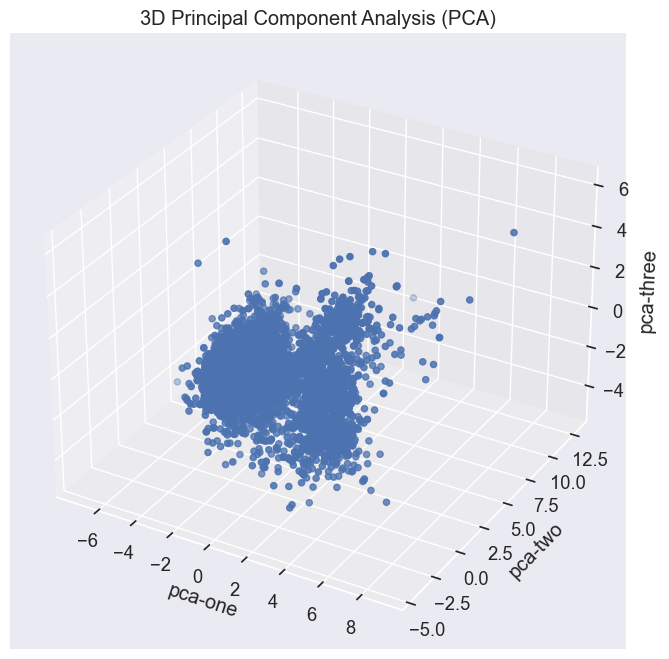

In [60]:
# Visualizing the results of the 3D PCA.
ax = plt.figure(figsize=(8,8)).gca(projection='3d')
plt.title('3D Principal Component Analysis (PCA)')
ax.scatter(
    xs=principal_component1, 
    ys=principal_component2, 
    zs=principal_component3, 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

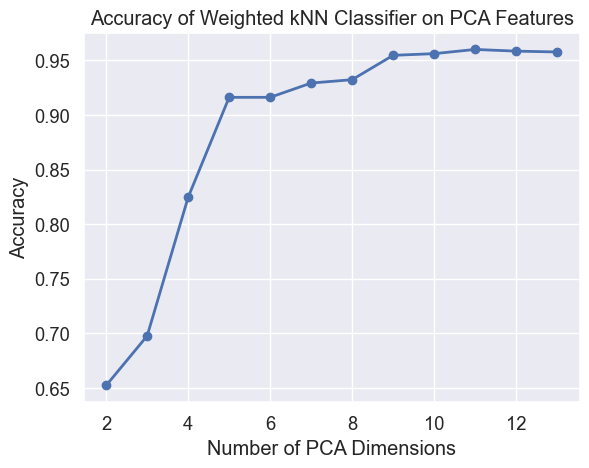

In [61]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dims = np.arange(2, X.shape[1]+1)
accs = []
for d in dims:
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn.fit(X_train_pca, y_train)
    acc = knn.score(X_test_pca, y_test)
    accs.append(acc)

import matplotlib.pyplot as plt
plt.plot(dims, accs, 'bo-', linewidth=2)
plt.xlabel('Number of PCA Dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy of Weighted kNN Classifier on PCA Features')
plt.grid(True)
plt.show()

In [62]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Apply PCA and select the first 3 principal components
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Apply weighted KNN with k=68 and weights=distance
knn = KNeighborsClassifier(n_neighbors=40, weights='distance')
knn.fit(X_train_pca, y_train)

# Evaluate the model
accuracy = knn.score(X_test_pca, y_test)
print("Test Accuracy:", accuracy)

accuracy_scores = cross_val_score(knn, X_train_pca, y_train, cv=5)

print("CV Accuracy scores:", accuracy_scores)
print("CV Average accuracy:", accuracy_scores.mean())

Test Accuracy: 0.7115384615384616
CV Accuracy scores: [0.67980769 0.70865385 0.67853705 0.68046198 0.70452358]
CV Average accuracy: 0.6903968312726734


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

# Perform LDA with 3 components and cr oss-validation
lda = LinearDiscriminantAnalysis(n_components=3)
scores = cross_val_score(lda, X_train, y_train, cv=5)
print("Mean CV accuracy:", scores.mean())

# Project the training and testing sets onto the LDA projection
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

# Apply KNN with k=40
knn = KNeighborsClassifier(n_neighbors=40, weights='distance')
knn.fit(X_train_lda, y_train)

# Evaluate the model
accuracy = knn.score(X_test_lda, y_test)
print("Test Accuracy:", accuracy)

# Compute cross-validation accuracy scores
accuracy_scores = cross_val_score(knn, X_train_lda, y_train, cv=5)
print("CV Accuracy scores:", accuracy_scores)
print("CV Average accuracy:", accuracy_scores.mean())

Mean CV accuracy: 1.0
Test Accuracy: 1.0
CV Accuracy scores: [1. 1. 1. 1. 1.]
CV Average accuracy: 1.0


## Assignment 2 Question 2 implementation starts here
### Question
2 Naive Bayes Classifier
Now you will classify the two datasets using the Naive Bayes Classifier. There are a number
of these available, for our datasets, the Multinomial Naive Bayes and Complement Naive
Bayes forms seem most appropriate, so we will experiment with those.
1. Use 5-fold cross validation to compare both versions of Naive Bayes against your previous
best results from kNN. Do this on all 6 of your datasets.
2. You can have some analysis here or plot to highlight any interesting issues. There are also
variants of Naive Bayes you may want to explore.
3. Produce a table comparing the accuracies on the different datasets.
Include summary accuracy scores on all six datasets in the table in the last question.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [65]:
# Load raw abalone dataset
abalone_df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

# Separate indep and dep features
X_abalone = abalone_df.iloc[:, 1:-1] # Removed the sex feature
y_abalone = abalone_df.iloc[:, -1]

# Normalize dataset 
sc1 = MinMaxScaler()
X_abalone = sc1.fit_transform(X_abalone)
X_abalone

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.15030262, 0.1323239 ,
        0.14798206],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06624075, 0.06319947,
        0.06826109],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.17182246, 0.18564845,
        0.2077728 ],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.3527236 , 0.37788018,
        0.30543099],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.35642233, 0.34298881,
        0.29347285],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.63517149, 0.49506254,
        0.49177877]])

In [66]:
# Apply PCA on abalone dataset
pca = PCA(n_components=3)
abalone_pca = pca.fit_transform(X_abalone)
abalone_pca_df = pd.DataFrame(data=abalone_pca, columns=['PC1', 'PC2', 'PC3'])
abalone_pca_df

,PC1,PC2,PC3
0,-0.230816,-0.026563,-0.006786
1,-0.497671,0.043791,0.003049
2,-0.068857,-0.081454,0.011720
3,-0.230997,-0.012962,0.004214
4,-0.532797,0.057362,-0.000513
...,...,...,...
4172,0.100632,-0.034549,-0.011468
4173,0.128141,-0.023082,-0.028686
4174,0.273938,0.019037,-0.025086
4175,0.262282,-0.027659,-0.045737


In [67]:
# Apply LDA on raw abalone dataset
X_abalone_lda = X_abalone
y_abalone_lda = y_abalone
lda = LinearDiscriminantAnalysis(n_components=3)
X_abalone_lda = lda.fit(X_abalone_lda, y_abalone_lda).transform(X_abalone_lda)
abalone_lda_df = pd.DataFrame(X_abalone_lda, y_abalone_lda)
abalone_lda_df

,0,1,2
Rings,,,
15,-0.791003,-0.235208,0.359351
7,-2.355522,0.336978,0.214024
9,0.766719,-0.246564,1.129422
10,-0.611434,0.098075,0.230542
7,-2.674301,0.527509,0.102575
...,...,...,...
11,0.921330,-0.612381,-0.272399
10,0.425796,-0.894428,-0.034727
9,1.064523,-0.385654,-0.787231


# Wine Datasets

In [68]:
wine_r = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-red.csv", sep=';')
wine_r["colour"]=1
wine_w = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-white.csv", sep=';')
wine_w["colour"]=0
wine_raw = pd.concat([wine_w,wine_r], ignore_index=True)
wine_raw.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,0
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,0
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,0
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,0


In [69]:
# Separate indep and dep features
X_wine1 = wine_raw.iloc[:, :-2]
y_wine = wine_raw.iloc[:, -2]
X_wine = pd.concat([X_wine1, wine_raw.iloc[:, -1]], axis=1)

# Normalize dataset 
sc2 = MinMaxScaler()
X_wine = sc2.fit_transform(X_wine)
X_wine.shape, y_wine.shape

((6497, 12), (6497,))

In [70]:
# Apply PCA on wine dataset for dimensionality reduction
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_wine)
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PC1', 'PC2'])
wine_pca_df

,PC1,PC2
0,-0.298897,-0.337622
1,-0.241913,-0.084556
2,-0.225052,-0.036821
3,-0.290807,-0.123910
4,-0.290807,-0.123910
...,...,...
6492,0.793106,0.054298
6493,0.789921,0.151012
6494,0.790787,0.111938
6495,0.808678,0.031407


In [71]:
# Apply LDA on raw wine dataset
X_wine_lda = X_wine
y_wine_lda = y_wine
lda = LinearDiscriminantAnalysis(n_components=2)
X_wine_lda = lda.fit(X_wine_lda, y_wine_lda).transform(X_wine_lda)
wine_lda_df = pd.DataFrame(X_wine_lda, y_wine_lda)
print(wine_lda_df.shape)
wine_lda_df

(6497, 2)


,0,1
quality,,
6,0.752078,-1.466209
6,1.445150,0.392049
6,-0.123015,0.911451
6,0.288961,-0.721769
6,0.288961,-0.721769
...,...,...
5,0.512278,-0.224430
6,-0.514707,-0.597340
6,-0.231160,-0.831907


# Abalone - raw dataset - Multimonial naive bayes:

If we apply Standardisation to the Abalone dataset, values become negative and that is not acceptable as a values to Naive Bayes classifiers. Hence, we need to use MinMaxScaler (Normalization) to scale down values only within 0 and 1. However, this will decrease the accuracy of the model.

In [72]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB

kf = StratifiedKFold(n_splits=5)
acc_list = []
acc_all = []
for train_index, test_index in kf.split(X_abalone, y_abalone):
    X_train, X_test = X_abalone[train_index], X_abalone[test_index]
    y_train, y_test = y_abalone[train_index], y_abalone[test_index]
    # Create model for every fold
    # Multinimial NB
    multi = MultinomialNB()
    multi.fit(X_train, y_train)
    y_pred = multi.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))

avg_acc = sum(acc_list)/5
acc_all.append(avg_acc)

The accuracy of a model on the Raw abalone dataset has significantly reduced from 26% to 16.5% with Naive Bayes compared to KNN using 10 neighbors measured in the previous assignment. While it’s likely that neither algorithm is adequate for predicting the abalone age, the KNN model is more accurate so far 

# Wine - Raw dataset - Multinomial Naive Bayes:


In [73]:
# Running KNN on the Wine Raw dataset

# Separate indep and dep features
X_wine1 = wine_raw.iloc[:, :-2]
y_wine = wine_raw.iloc[:, -2]
X_wine = pd.concat([X_wine1, wine_raw.iloc[:, -1]], axis=1)

# Normalize dataset 
sc2 = MinMaxScaler(feature_range=(0, 1))
X_wine = sc2.fit_transform(X_wine)
X_wine.shape, y_wine.shape

kf = StratifiedKFold(n_splits=5)
acc_list = []

for train_index, test_index in kf.split(X_wine, y_wine):
    X_train, X_test = X_wine[train_index], X_wine[test_index]
    y_train, y_test = y_wine[train_index], y_wine[test_index]
    # Create model for every fold
    # Multinimial NB
    multi = KNeighborsClassifier(n_neighbors=10)
    multi.fit(X_train, y_train)
    y_pred = multi.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))

avg_acc = sum(acc_list)/5
avg_acc

0.46159223071001365

In [74]:
kf = StratifiedKFold(n_splits=5)
acc_list = []

for train_index, test_index in kf.split(X_wine, y_wine):
    X_train, X_test = X_wine[train_index], X_wine[test_index]
    y_train, y_test = y_wine[train_index], y_wine[test_index]
    # Create model for every fold
    # Multinimial NB
    multi = MultinomialNB()
    multi.fit(X_train, y_train)
    y_pred = multi.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))

avg_acc = sum(acc_list)/5
acc_all.append(avg_acc)

In [75]:
acc_all

[0.16495086382259405, 0.414954106709303]

KNN Algorithm has worked slightly better on the Wine (Raw) dataset compared to Multinomial Naive Bayes as the accuracy has gone down from 46.15% to an average of 41.5% accross 5-folds. A combination of Standardisation and then KNN has no significant effect on the accuracy improvement. 

# Abalone - Raw - Complement NB

In [76]:
kf = StratifiedKFold(n_splits=5)
acc_list = []
for train_index, test_index in kf.split(X_abalone, y_abalone):
    X_train, X_test = X_abalone[train_index], X_abalone[test_index]
    y_train, y_test = y_abalone[train_index], y_abalone[test_index]
    # Create model for every fold
    comp = ComplementNB()
    comp.fit(X_train, y_train)
    y_pred = comp.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))

avg_acc = sum(acc_list)/5
avg_acc

0.17500329484571525

# Wine dataset - raw - complement NB

In [77]:
X_wine1 = wine_raw.iloc[:, :-2]
y_wine = wine_raw.iloc[:, -2]
X_wine = pd.concat([X_wine1, wine_raw.iloc[:, -1]], axis=1)

# Normalize dataset 
sc2 = MinMaxScaler()
X_wine = sc2.fit_transform(X_wine)
X_wine.shape, y_wine.shape

kf = StratifiedKFold(n_splits=5)
acc_list = []

for train_index, test_index in kf.split(X_wine, y_wine):
    X_train, X_test = X_wine[train_index], X_wine[test_index]
    y_train, y_test = y_wine[train_index], y_wine[test_index]
    # Create model for every fold
    multi = ComplementNB()
    multi.fit(X_train, y_train)
    y_pred = multi.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))

avg_acc = sum(acc_list)/5
avg_acc

0.38971090187718366

In [78]:
#X_abalone = abalone_df.iloc[:, 1:-1] # Removed the sex feature
#y_abalone = abalone_df.iloc[:, -1]
#abalone_pca = pca.fit_transform(X_abalone)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
abalone_df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

# Separate indep and dep features
X_abalone = abalone_df.iloc[:, 1:-1] # Removed the sex feature
y_abalone = abalone_df.iloc[:, -1]
# print(y_abalone)

# Normalize dataset 
sc1 = MinMaxScaler(feature_range=(0, 1))
X_abalone = sc1.fit_transform(X_abalone)
X_abalone

# Split data into features and target variable
X = X_abalone
y = y_abalone

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca_fit = pca.fit_transform(X)

# Normalize the values between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_pca = scaler.fit_transform(X_pca_fit)

# Apply LDA with 3 components
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda_fit = lda.fit_transform(X, y)

scaler = MinMaxScaler(feature_range=(0, 1))
X_lda = scaler.fit_transform(X_lda_fit)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mnb_clf = MultinomialNB()

cnb_clf = ComplementNB()

mnb_cv_scores = cross_val_score(mnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of Raw abalone using Multinomial Naive Bayes classifier: {:.2f}%".format(mnb_cv_scores.mean() * 100))

cnb_cv_scores = cross_val_score(cnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of Raw abalone using Complement Naive Bayes classifier: {:.2f}%".format(cnb_cv_scores.mean() * 100))

mnb_clf.fit(X_train, y_train)
mnb_test_acc = mnb_clf.score(X_test, y_test)
print("Test accuracy of Raw abalone using Multinomial Naive Bayes classifier: {:.2f}%".format(mnb_test_acc * 100))

cnb_clf.fit(X_train, y_train)
cnb_test_acc = cnb_clf.score(X_test, y_test)
print("Test accuracy of Raw abalone using Complement Naive Bayes classifier: {:.2f}%".format(cnb_test_acc * 100))


Cross-validation accuracy of Raw abalone using Multinomial Naive Bayes classifier: 16.37%
Cross-validation accuracy of Raw abalone using Complement Naive Bayes classifier: 18.14%
Test accuracy of Raw abalone using Multinomial Naive Bayes classifier: 16.99%
Test accuracy of Raw abalone using Complement Naive Bayes classifier: 19.14%


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

mnb_clf = MultinomialNB()

cnb_clf = ComplementNB()

pca_mnb_cv_scores = cross_val_score(mnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of processed abalone using Multinomial Naive Bayes classifier with PCA: {:.2f}%".format(pca_mnb_cv_scores.mean() * 100))

pca_cnb_cv_scores = cross_val_score(cnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of processed abalone using Complement Naive Bayes classifier with PCA: {:.2f}%".format(pca_cnb_cv_scores.mean() * 100))

mnb_clf.fit(X_train, y_train)
pca_mnb_test_acc = mnb_clf.score(X_test, y_test)
print("Test accuracy of processed abalone using Multinomial Naive Bayes classifier with PCA: {:.2f}%".format(pca_mnb_test_acc * 100))

cnb_clf.fit(X_train, y_train)
pca_cnb_test_acc = cnb_clf.score(X_test, y_test)
print("Test accuracy of processed abalone using Complement Naive Bayes classifier with PCA: {:.2f}%".format(pca_cnb_test_acc * 100))


Cross-validation accuracy of processed abalone using Multinomial Naive Bayes classifier with PCA: 16.37%
Cross-validation accuracy of processed abalone using Complement Naive Bayes classifier with PCA: 18.26%
Test accuracy of processed abalone using Multinomial Naive Bayes classifier with PCA: 16.99%
Test accuracy of processed abalone using Complement Naive Bayes classifier with PCA: 17.22%


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

lda_mnb_cv_scores = cross_val_score(mnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of processed abalone using Multinomial Naive Bayes classifier with LDA: {:.2f}%".format(lda_mnb_cv_scores.mean() * 100))

lda_cnb_cv_scores = cross_val_score(cnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of processed abalone using Complement Naive Bayes classifier with LDA: {:.2f}%".format(lda_cnb_cv_scores.mean() * 100))

mnb_clf.fit(X_train, y_train)
lda_mnb_test_acc = mnb_clf.score(X_test, y_test)
print("Test accuracy of processed abalone using Multinomial Naive Bayes classifier LDA: {:.2f}%".format(lda_mnb_test_acc * 100))

cnb_clf.fit(X_train, y_train)
lda_cnb_test_acc = cnb_clf.score(X_test, y_test)
print("Test accuracy of processed abalone using Complement Naive Bayes classifier LDA: {:.2f}%".format(lda_cnb_test_acc * 100))

Cross-validation accuracy of processed abalone using Multinomial Naive Bayes classifier with LDA: 16.37%
Cross-validation accuracy of processed abalone using Complement Naive Bayes classifier with LDA: 23.97%
Test accuracy of processed abalone using Multinomial Naive Bayes classifier LDA: 16.99%
Test accuracy of processed abalone using Complement Naive Bayes classifier LDA: 21.53%


# Using Wine Dataset

In [81]:
wine_r = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-red.csv", sep=';')
wine_r["colour"]=1
wine_w = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-white.csv", sep=';')
wine_w["colour"]=0
wine_raw = pd.concat([wine_w,wine_r], ignore_index=True)
wine_raw.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,0
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,0
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,0
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,0


In [82]:
#Split dataset into X and Y
X_wine = wine_raw.iloc[:, :-1]
y_wine = wine_raw.iloc[:, -2]
print(y)
sc_wine = MinMaxScaler(feature_range=(0, 1))
X_wine = sc_wine.fit_transform(X_wine)
print("The normalized dataset is: \n", X)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64
The normalized dataset is: 
 [[0.51351351 0.5210084  0.0840708  ... 0.15030262 0.1323239  0.14798206]
 [0.37162162 0.35294118 0.07964602 ... 0.06624075 0.06319947 0.06826109]
 [0.61486486 0.61344538 0.11946903 ... 0.17182246 0.18564845 0.2077728 ]
 ...
 [0.70945946 0.70588235 0.18141593 ... 0.3527236  0.37788018 0.30543099]
 [0.74324324 0.72268908 0.13274336 ... 0.35642233 0.34298881 0.29347285]
 [0.85810811 0.84033613 0.17256637 ... 0.63517149 0.49506254 0.49177877]]


In [83]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
X_wine_pca_fit = pca.fit_transform(X_wine)

# Normalize the values between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_wine_pca = scaler.fit_transform(X_wine_pca_fit)

# Apply LDA with 3 components
lda = LinearDiscriminantAnalysis(n_components=3)
X_wine_lda_fit = lda.fit_transform(X_wine, y_wine)

# Normalize the values between 0 and 1 using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_wine_lda = scaler.fit_transform(X_wine_lda_fit)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

mnb_clf = MultinomialNB()

cnb_clf = ComplementNB()

mnb_cv_scores = cross_val_score(mnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of raw wine using Multinomial Naive Bayes classifier: {:.2f}%".format(mnb_cv_scores.mean() * 100))

cnb_cv_scores = cross_val_score(cnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of raw wine using Complement Naive Bayes classifier: {:.2f}%".format(cnb_cv_scores.mean() * 100))

mnb_clf.fit(X_train, y_train)
mnb_test_acc = mnb_clf.score(X_test, y_test)
print("Test accuracy of raw wine using Multinomial Naive Bayes classifier: {:.2f}%".format(mnb_test_acc * 100))

cnb_clf.fit(X_train, y_train)
cnb_test_acc = cnb_clf.score(X_test, y_test)
print("Test accuracy of raw wine using Complement Naive Bayes classifier: {:.2f}%".format(cnb_test_acc * 100))

Cross-validation accuracy of raw wine using Multinomial Naive Bayes classifier: 43.54%
Cross-validation accuracy of raw wine using Complement Naive Bayes classifier: 47.51%
Test accuracy of raw wine using Multinomial Naive Bayes classifier: 44.62%
Test accuracy of raw wine using Complement Naive Bayes classifier: 48.54%


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_wine_pca, y_wine, test_size=0.2, random_state=42)

mnb_clf = MultinomialNB()

cnb_clf = ComplementNB()

pca_mnb_cv_scores = cross_val_score(mnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of processed wine using Multinomial Naive Bayes classifier with PCA: {:.2f}%".format(pca_mnb_cv_scores.mean() * 100))

pca_cnb_cv_scores = cross_val_score(cnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of processed wine using Complement Naive Bayes classifier with PCA: {:.2f}%".format(pca_cnb_cv_scores.mean() * 100))

mnb_clf.fit(X_train, y_train)
pca_mnb_test_acc = mnb_clf.score(X_test, y_test)
print("Test accuracy of processed wine using Multinomial Naive Bayes classifier with PCA: {:.2f}%".format(pca_mnb_test_acc * 100))

cnb_clf.fit(X_train, y_train)
pca_cnb_test_acc = cnb_clf.score(X_test, y_test)
print("Test accuracy of processed wine using Complement Naive Bayes classifier with PCA: {:.2f}%".format(pca_cnb_test_acc * 100))

Cross-validation accuracy of processed wine using Multinomial Naive Bayes classifier with PCA: 43.43%
Cross-validation accuracy of processed wine using Complement Naive Bayes classifier with PCA: 45.41%
Test accuracy of processed wine using Multinomial Naive Bayes classifier with PCA: 44.54%
Test accuracy of processed wine using Complement Naive Bayes classifier with PCA: 46.92%


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_wine_lda, y_wine, test_size=0.2, random_state=42)

lda_mnb_cv_scores = cross_val_score(mnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of processed wine using Multinomial Naive Bayes classifier with LDA: {:.2f}%".format(lda_mnb_cv_scores.mean() * 100))

lda_cnb_cv_scores = cross_val_score(cnb_clf, X_train, y_train, cv=5)
print("Cross-validation accuracy of processed wine using Complement Naive Bayes classifier with LDA: {:.2f}%".format(lda_cnb_cv_scores.mean() * 100))

mnb_clf.fit(X_train, y_train)
lda_mnb_test_acc = mnb_clf.score(X_test, y_test)
print("Test accuracy of processed wine using Multinomial Naive Bayes classifier with LDA: {:.2f}%".format(lda_mnb_test_acc * 100))

cnb_clf.fit(X_train, y_train)
lda_cnb_test_acc = cnb_clf.score(X_test, y_test)
print("Test accuracy of processed wine using Complement Naive Bayes classifier with LDA: {:.2f}%".format(lda_cnb_test_acc * 100))

Cross-validation accuracy of processed wine using Multinomial Naive Bayes classifier with LDA: 43.43%
Cross-validation accuracy of processed wine using Complement Naive Bayes classifier with LDA: 0.54%
Test accuracy of processed wine using Multinomial Naive Bayes classifier with LDA: 44.54%
Test accuracy of processed wine using Complement Naive Bayes classifier with LDA: 0.15%


# Assignment 2 Question 3 implementation starts here
### Question 3: 
3 Decision Trees Classifier
You will now do classification on your datasets using Decision Trees. Decision Trees have a number
of parameters that can effect peformance. You can use the GridSearchCV function for this question.
1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for
classification on each dataset.
• the maximum depth of trees
2. Produce a plot showing the mean accuracy vs. relative to tree depth.
3. Interpretability: Use the decision tree library functions, to examine the final resulting
splitting rules used for the trees. Do they indicate any interesting patterns that explain the
data? Can you find support for this from any analysis you’ve done or see on this dataset
previously? For this part, use the original raw feature space only, not the PCA/LDA space.
(Why not?)
• Relevant decision tree visualizers, whichever one you use, make sure it is readable in
useful way, don’t show information that isn’t helpful:
• tree.plot tree(): the built-in tree plot function for
• sklearn.tree.DecisionTree tree.export graphviz : another simple visualizer
• sklearn.tree.export text : text view of the tree data
Include summary accuracy scores on all six datasets in the table in the last question.

## Using Abalone Dataset

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Load raw abalone dataset
abalone_df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

# Separate indep and dep features
X_abalone = abalone_df.iloc[:, 1:-1] # Removed the sex feature
y_abalone = abalone_df.iloc[:, -1]

# Normalize dataset 
sc1 = MinMaxScaler()
X_abalone = sc1.fit_transform(X_abalone)
X_abalone

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.15030262, 0.1323239 ,
        0.14798206],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06624075, 0.06319947,
        0.06826109],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.17182246, 0.18564845,
        0.2077728 ],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.3527236 , 0.37788018,
        0.30543099],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.35642233, 0.34298881,
        0.29347285],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.63517149, 0.49506254,
        0.49177877]])

In [89]:
# Apply PCA on abalone dataset
pca = PCA(n_components=3)
abalone_pca = pca.fit_transform(X_abalone)
abalone_pca_df = pd.DataFrame(data=abalone_pca, columns=['PC1', 'PC2', 'PC3'])
abalone_pca_df

,PC1,PC2,PC3
0,-0.230816,-0.026563,-0.006786
1,-0.497671,0.043791,0.003049
2,-0.068857,-0.081454,0.011720
3,-0.230997,-0.012962,0.004214
4,-0.532797,0.057362,-0.000513
...,...,...,...
4172,0.100632,-0.034549,-0.011468
4173,0.128141,-0.023082,-0.028686
4174,0.273938,0.019037,-0.025086
4175,0.262282,-0.027659,-0.045737


In [90]:
# Apply LDA on raw abalone dataset
X_abalone_lda = X_abalone
y_abalone_lda = y_abalone
lda = LinearDiscriminantAnalysis(n_components=3)
X_abalone_lda = lda.fit(X_abalone_lda, y_abalone_lda).transform(X_abalone_lda)
abalone_lda_df = pd.DataFrame(X_abalone_lda, y_abalone_lda)
abalone_lda_df

,0,1,2
Rings,,,
15,-0.791003,-0.235208,0.359351
7,-2.355522,0.336978,0.214024
9,0.766719,-0.246564,1.129422
10,-0.611434,0.098075,0.230542
7,-2.674301,0.527509,0.102575
...,...,...,...
11,0.921330,-0.612381,-0.272399
10,0.425796,-0.894428,-0.034727
9,1.064523,-0.385654,-0.787231


### Wine Dataset 

In [91]:
wine_r = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-red.csv", sep=';')
wine_r["colour"]=1
wine_w = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-white.csv", sep=';')
wine_w["colour"]=0
wine_raw = pd.concat([wine_w,wine_r], ignore_index=True)
wine_raw.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,0
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,0
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,0
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,0


In [92]:
# Separate indep and dep features
X_wine1 = wine_raw.iloc[:, :-2]
y_wine = wine_raw.iloc[:, -2]
X_wine = pd.concat([X_wine1, wine_raw.iloc[:, -1]], axis=1)

# Normalize dataset 
sc2 = MinMaxScaler()
X_wine = sc2.fit_transform(X_wine)
X_wine.shape, y_wine.shape

((6497, 12), (6497,))

In [93]:
# Apply PCA on wine dataset for dimensionality reduction
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_wine)
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PC1', 'PC2'])
wine_pca_df

,PC1,PC2
0,-0.298897,-0.337622
1,-0.241913,-0.084556
2,-0.225052,-0.036821
3,-0.290807,-0.123910
4,-0.290807,-0.123910
...,...,...
6492,0.793106,0.054298
6493,0.789921,0.151012
6494,0.790787,0.111938
6495,0.808678,0.031407


In [94]:
# Apply LDA on raw wine dataset
X_wine_lda = X_wine
y_wine_lda = y_wine
lda = LinearDiscriminantAnalysis(n_components=2)
X_wine_lda = lda.fit(X_wine_lda, y_wine_lda).transform(X_wine_lda)
wine_lda_df = pd.DataFrame(X_wine_lda, y_wine_lda)
print(wine_lda_df.shape)
wine_lda_df

(6497, 2)


,0,1
quality,,
6,0.752078,-1.466209
6,1.445150,0.392049
6,-0.123015,0.911451
6,0.288961,-0.721769
6,0.288961,-0.721769
...,...,...
5,0.512278,-0.224430
6,-0.514707,-0.597340
6,-0.231160,-0.831907


# Decision Tree on Abalone dataset

The DecisionTreeRegressor is an algorithm used to estimate a continous variable instead of a discrete one.

In [95]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor
score=[]
train_score=[]
kf = StratifiedKFold(n_splits=5)

for train_index, test_index in kf.split(X_abalone, y_abalone):
    X_train, X_test = X_abalone[train_index], X_abalone[test_index]
    y_train, y_test = y_abalone[train_index], y_abalone[test_index]
    
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    predicted_test_y = model.predict(X_test)
    predicted_train_y = model.predict(X_train) 
    train_score.append(model.score(X_train, y_train))
    score.append(model.score(X_test, y_test))
    
print("Testing score: ", score)
print("Training score: ", train_score)

Testing score:  [-0.029170677339277695, 0.1593988145639289, 0.07566737009552604, 0.14899358230388193, 0.13245339011866875]
Training score:  [1.0, 1.0, 1.0, 1.0, 1.0]


This model overfits the dataset and that is why, validation error is very high.

In [96]:
def scatter_y(true_y, predicted_y):
    
    fig, ax = plt.subplots(figsize=(4,4))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(28, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

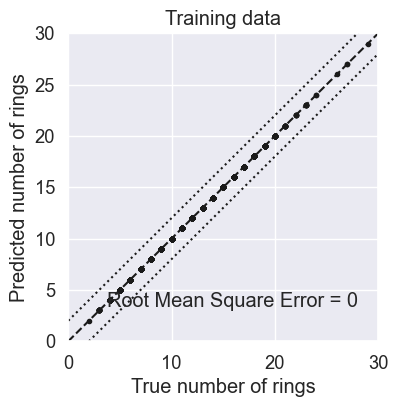

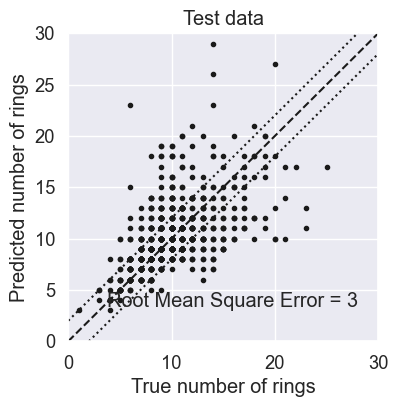

In [97]:
scatter_y(y_train, predicted_train_y)
plt.title("Training data")
scatter_y(y_test, predicted_test_y)
plt.title("Test data");

The Decision Tree overfits the training set, i.e. its parameters are fine tuned to reproduce the results of the training set but generalized badly to data not seen previously.

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_abalone, y_abalone, test_size=0.2, random_state=1)
acc=[]
for i in range(1,10):
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) 
    acc.append(model.score(X_test, y_test))

In [99]:
acc

[0.2743675926265253,
 0.32115270603998214,
 0.3433132428439525,
 0.40126800234349214,
 0.4278684960176351,
 0.4340850300095299,
 0.4390516759870713,
 0.35617530225868343,
 0.3674679511109248]

### Using GridSearchCV

In [100]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
import graphviz
import matplotlib.pyplot as plt

# Load raw abalone dataset
abalone_df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

encoder = LabelEncoder()
abalone_df["Sex"] = encoder.fit_transform(abalone_df["Sex"])

# Split data into features and target
X = abalone_df.drop("Rings", axis=1)
y = abalone_df["Rings"]

param_grid = {
    "max_depth": [1, 2, 3, 4, 5]
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best accuracy score:", grid.best_score_)

Best parameters: {'max_depth': 4}
Best accuracy score: 0.26238260321462337


In [101]:
# Print the final decision tree using export_graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(grid.best_estimator_, out_file=None, 
                           feature_names=X.columns,  
                           class_names=["0-8", "9-10", "11-12", "13-14", "15-16", "17-18", "19-20", "21-22", "23-24", "25-26", "27-29", "30-31", "32-34", "35-38", "39-42", "43-46", "47-50", "51-54", "55-58", "59-62", "63-66", "67-70", "71-74", "75-78", "79-82", "83-86", "87-90", "91-96", "97+"],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("abalone_decision_tree")

# Print the final decision tree using text
from sklearn.tree import export_text
tree_rules = export_text(grid.best_estimator_, feature_names=X.columns.tolist())
print(tree_rules)

|--- Shell_weight <= 0.14
|   |--- Diameter <= 0.22
|   |   |--- Shell_weight <= 0.02
|   |   |   |--- Whole_weight <= 0.02
|   |   |   |   |--- class: 3
|   |   |   |--- Whole_weight >  0.02
|   |   |   |   |--- class: 4
|   |   |--- Shell_weight >  0.02
|   |   |   |--- Length <= 0.25
|   |   |   |   |--- class: 4
|   |   |   |--- Length >  0.25
|   |   |   |   |--- class: 5
|   |--- Diameter >  0.22
|   |   |--- Shell_weight <= 0.09
|   |   |   |--- Sex <= 1.50
|   |   |   |   |--- class: 7
|   |   |   |--- Sex >  1.50
|   |   |   |   |--- class: 9
|   |   |--- Shell_weight >  0.09
|   |   |   |--- Sex <= 0.50
|   |   |   |   |--- class: 8
|   |   |   |--- Sex >  0.50
|   |   |   |   |--- class: 7
|--- Shell_weight >  0.14
|   |--- Shell_weight <= 0.25
|   |   |--- Sucked_weight <= 0.43
|   |   |   |--- Shell_weight <= 0.19
|   |   |   |   |--- class: 8
|   |   |   |--- Shell_weight >  0.19
|   |   |   |   |--- class: 9
|   |   |--- Sucked_weight >  0.43
|   |   |   |--- Shell_weigh

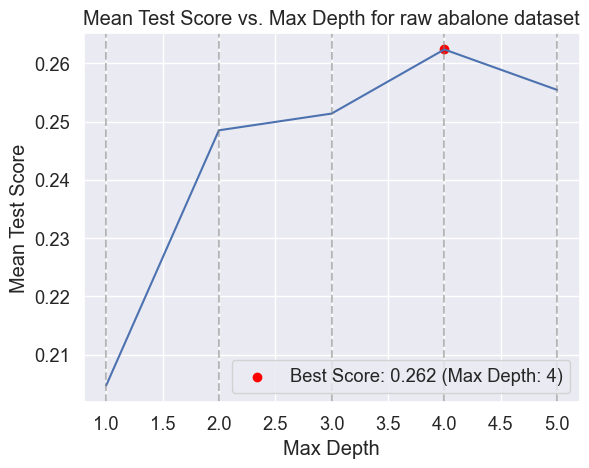

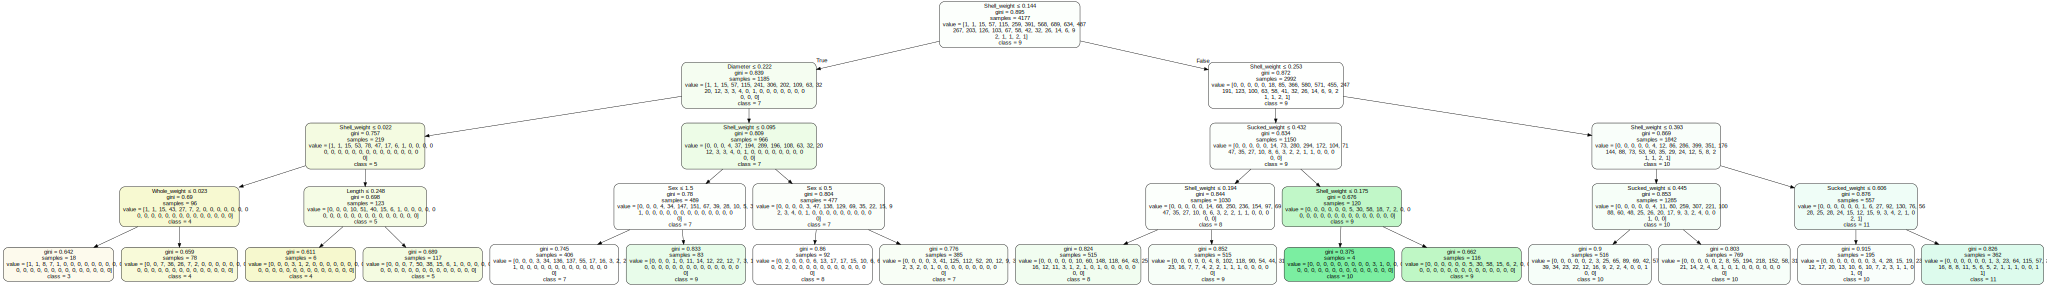

In [102]:
# Extract the mean test scores for each value of max_depth
mean_test_scores = grid.cv_results_['mean_test_score']

# Plot the mean test scores vs. max_depth
plt.plot(param_grid['max_depth'], mean_test_scores)
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. Max Depth for raw abalone dataset')

# Add vertical lines for each value of max_depth
for depth in param_grid['max_depth']:
    plt.axvline(depth, linestyle='--', color='gray', alpha=0.5)

# Annotate the plot with the best parameter value and score
best_score = grid.best_score_
best_depth = grid.best_params_['max_depth']
plt.scatter(best_depth, best_score, marker='o', color='red', label=f'Best Score: {best_score:.3f} (Max Depth: {best_depth})')
plt.legend()

plt.show()

# Print the final decision tree using export_graphviz
dot_data = export_graphviz(grid.best_estimator_,out_file=None,
feature_names=X.columns,
class_names=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"],
filled=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)

graph.view()

from IPython.display import display

dot_data = export_graphviz(
    grid.best_estimator_, 
    out_file=None,
    feature_names=X.columns,
    class_names=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
display(graph)

##### from the above graph we can see that that maximum depth of 4 is yielding the high test accuracy score of 26.23%

In [103]:
#Finding other best hyper parameters
param_grid = {
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [None, 5, 10, 15, 20]
    
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid.fit(X, y)

print("Best parameters:", grid.best_params_)
print("Best accuracy score:", grid.best_score_)

Best parameters: {'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best accuracy score: 0.2688488095579177


In [104]:
#using GridSearchCV function as mentioned in the assignment
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Load raw abalone dataset
abalone_df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

encoder = LabelEncoder()
abalone_df["Sex"] = encoder.fit_transform(abalone_df["Sex"])

X = abalone_df.drop("Rings", axis=1)
# Normalize dataset 
sc1 = MinMaxScaler()
X = sc1.fit_transform(X)

# X = pd.DataFrame(data=X, columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Sucked_weight', 'Viscera_weight', 'Shell_weight'])

# print(X)

# Apply PCA to X
pca = PCA(n_components=3)
X = pca.fit_transform(X)

X = pd.DataFrame(data=X, columns=['PC1', 'PC2', 'PC3'])

y = abalone_df["Rings"]

param_grid = {
    "max_depth": [1, 2, 3, 4, 5]
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_pca = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid_pca.fit(X, y)

print("Best parameters:", grid_pca.best_params_)
print("Best accuracy score:", grid_pca.best_score_)


Best parameters: {'max_depth': 3}
Best accuracy score: 0.2542440477895883


In [105]:
# Print the final decision tree using export_graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(grid_pca.best_estimator_, out_file=None, 
                           feature_names=X.columns,  
                           class_names=["0-8", "9-10", "11-12", "13-14", "15-16", "17-18", "19-20", "21-22", "23-24", "25-26", "27-29", "30-31", "32-34", "35-38", "39-42", "43-46", "47-50", "51-54", "55-58", "59-62", "63-66", "67-70", "71-74", "75-78", "79-82", "83-86", "87-90", "91-96", "97+"],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("abalone_decision_tree")

# Print the final decision tree using text
from sklearn.tree import export_text
tree_rules = export_text(grid_pca.best_estimator_, feature_names=X.columns.tolist())
print(tree_rules)

|--- PC2 <= -0.25
|   |--- PC3 <= 0.09
|   |   |--- PC1 <= 0.45
|   |   |   |--- class: 7
|   |   |--- PC1 >  0.45
|   |   |   |--- class: 10
|   |--- PC3 >  0.09
|   |   |--- PC2 <= -0.68
|   |   |   |--- class: 4
|   |   |--- PC2 >  -0.68
|   |   |   |--- class: 5
|--- PC2 >  -0.25
|   |--- PC2 <= 0.02
|   |   |--- PC1 <= 0.02
|   |   |   |--- class: 8
|   |   |--- PC1 >  0.02
|   |   |   |--- class: 9
|   |--- PC2 >  0.02
|   |   |--- PC2 <= 0.38
|   |   |   |--- class: 10
|   |   |--- PC2 >  0.38
|   |   |   |--- class: 11



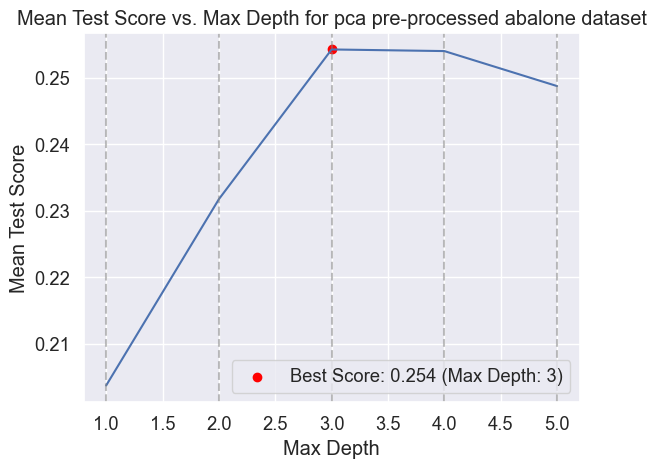

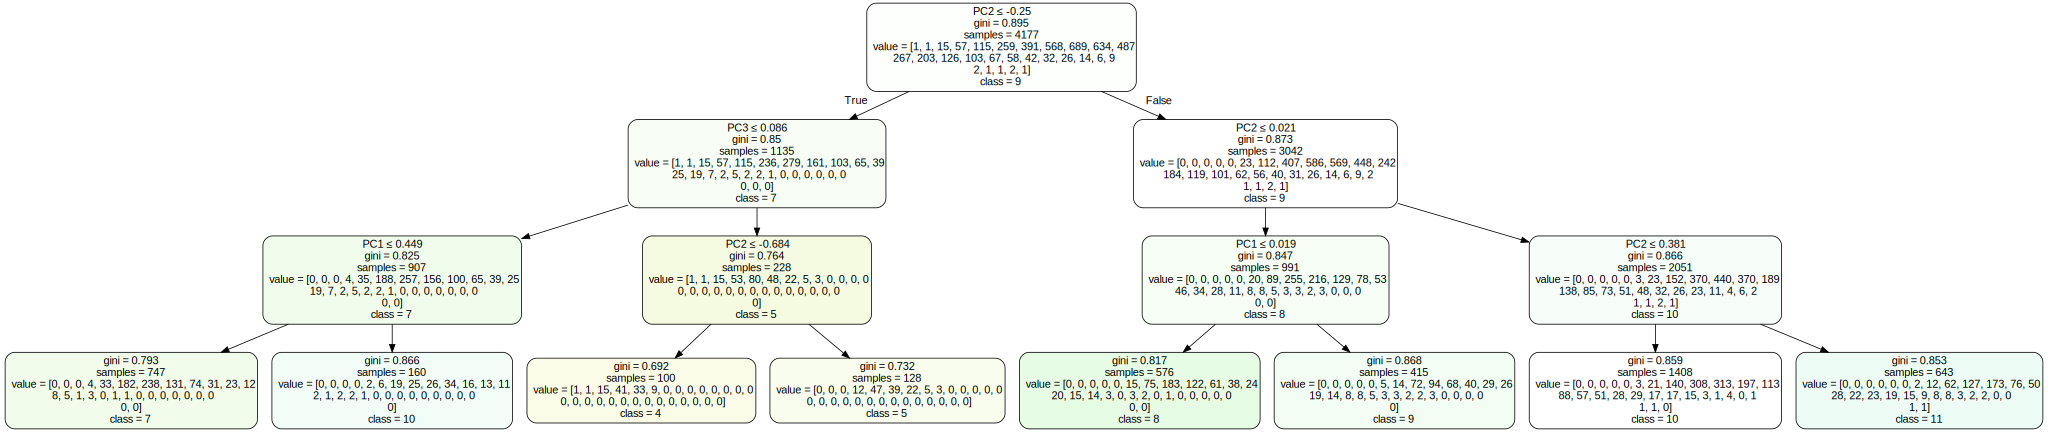

In [106]:
# Extract the mean test scores for each value of max_depth
mean_test_scores = grid_pca.cv_results_['mean_test_score']

# Plot the mean test scores vs. max_depth
plt.plot(param_grid['max_depth'], mean_test_scores)
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. Max Depth for pca pre-processed abalone dataset')

# Add vertical lines for each value of max_depth
for depth in param_grid['max_depth']:
    plt.axvline(depth, linestyle='--', color='gray', alpha=0.5)

# Annotate the plot with the best parameter value and score
best_score = grid_pca.best_score_
best_depth = grid_pca.best_params_['max_depth']
plt.scatter(best_depth, best_score, marker='o', color='red', label=f'Best Score: {best_score:.3f} (Max Depth: {best_depth})')
plt.legend()

plt.show()

# Print the final decision tree using export_graphviz
dot_data = export_graphviz(grid_pca.best_estimator_,out_file=None,
feature_names=X.columns,
class_names=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"],
filled=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)

graph.view()

# Print the final decision tree using export_graphviz
dot_data = export_graphviz(grid_pca.best_estimator_, out_file=None,
feature_names=X.columns,
class_names=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"],
filled=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)

# graph.view()
display(graph)

##### from the above graph we can see that that maximum depth of 3 is yielding the high test accuracy score of 25.42%

In [107]:
#Finding the best hyperparameters
param_grid = {
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [None, 5, 10, 15, 20]
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_pca = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid_pca.fit(X, y)

print("Best parameters:", grid_pca.best_params_)
print("Best accuracy score:", grid_pca.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best accuracy score: 0.25376471936509754


In [108]:
##Using LDA

#using GridSearchCV function as mentioned in the assignment
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load raw abalone dataset
abalone_df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

encoder = LabelEncoder()
abalone_df["Sex"] = encoder.fit_transform(abalone_df["Sex"])

X = abalone_df.drop("Rings", axis=1)
y = abalone_df["Rings"]
# Normalize dataset 
sc1 = MinMaxScaler()
X = sc1.fit_transform(X)

# X = pd.DataFrame(data=X, columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Sucked_weight', 'Viscera_weight', 'Shell_weight'])

# print(X)

# Apply LDA to X
lda = LinearDiscriminantAnalysis(n_components=3)
X = lda.fit_transform(X, y)

X = pd.DataFrame(data=X, columns=['LDA1', 'LDA2', 'LDA3'])

param_grid = {
    "max_depth": [1, 2, 3, 4, 5]
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_lda = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid_lda.fit(X, y)

print("Best parameters:", grid_lda.best_params_)
print("Best accuracy score:", grid_lda.best_score_)


Best parameters: {'max_depth': 5}
Best accuracy score: 0.2623840357562387


In [109]:
# Print the final decision tree using export_graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(grid_lda.best_estimator_, out_file=None, 
                           feature_names=X.columns,  
                           class_names=["0-8", "9-10", "11-12", "13-14", "15-16", "17-18", "19-20", "21-22", "23-24", "25-26", "27-29", "30-31", "32-34", "35-38", "39-42", "43-46", "47-50", "51-54", "55-58", "59-62", "63-66", "67-70", "71-74", "75-78", "79-82", "83-86", "87-90", "91-96", "97+"],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("abalone_decision_tree")

# Print the final decision tree using text
from sklearn.tree import export_text
tree_rules = export_text(grid_lda.best_estimator_, feature_names=X.columns.tolist())
print(tree_rules)

|--- LDA1 <= -0.60
|   |--- LDA1 <= -3.28
|   |   |--- LDA1 <= -4.13
|   |   |   |--- LDA2 <= -2.77
|   |   |   |   |--- LDA1 <= -6.99
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- LDA1 >  -6.99
|   |   |   |   |   |--- class: 3
|   |   |   |--- LDA2 >  -2.77
|   |   |   |   |--- LDA3 <= -0.49
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- LDA3 >  -0.49
|   |   |   |   |   |--- class: 4
|   |   |--- LDA1 >  -4.13
|   |   |   |--- LDA3 <= -0.17
|   |   |   |   |--- LDA1 <= -3.63
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- LDA1 >  -3.63
|   |   |   |   |   |--- class: 6
|   |   |   |--- LDA3 >  -0.17
|   |   |   |   |--- LDA1 <= -3.64
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- LDA1 >  -3.64
|   |   |   |   |   |--- class: 5
|   |--- LDA1 >  -3.28
|   |   |--- LDA1 <= -1.45
|   |   |   |--- LDA1 <= -2.01
|   |   |   |   |--- LDA1 <= -3.25
|   |   |   |   |   |--- class: 7
|   |   |   |   |--- LDA1 >  -3.25
|   |   |   |   |   |--- class: 6
|   |   |

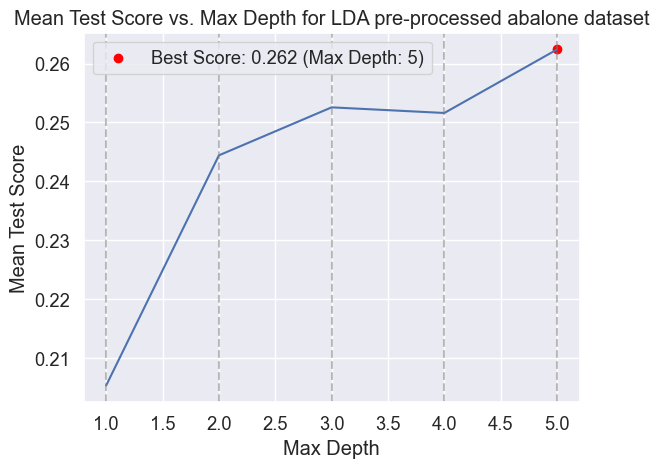

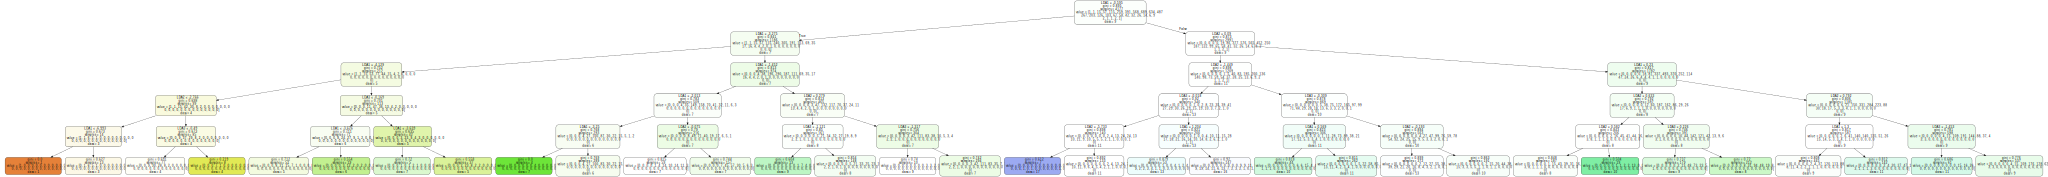

In [110]:
# Extract the mean test scores for each value of max_depth
mean_test_scores = grid_lda.cv_results_['mean_test_score']

# Plot the mean test scores vs. max_depth
plt.plot(param_grid['max_depth'], mean_test_scores)
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Score vs. Max Depth for LDA pre-processed abalone dataset')

# Add vertical lines for each value of max_depth
for depth in param_grid['max_depth']:
    plt.axvline(depth, linestyle='--', color='gray', alpha=0.5)

# Annotate the plot with the best parameter value and score
best_score = grid_lda.best_score_
best_depth = grid_lda.best_params_['max_depth']
plt.scatter(best_depth, best_score, marker='o', color='red', label=f'Best Score: {best_score:.3f} (Max Depth: {best_depth})')
plt.legend()

plt.show()

# Print the final decision tree using export_graphviz
dot_data = export_graphviz(grid_lda.best_estimator_,out_file=None,
feature_names=X.columns,
class_names=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"],
filled=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)

graph.view()

# Print the final decision tree using export_graphviz
dot_data = export_graphviz(grid_lda.best_estimator_, out_file=None,
feature_names=X.columns,
class_names=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"],
filled=True,
rounded=True,
special_characters=True)

graph = graphviz.Source(dot_data)

# graph.view()
display(graph)

##### from the above graph we can see that that maximum depth of 5 is yielding the high test accuracy score of 26.26%

In [111]:
#Finding the best hyperparameters
param_grid = {
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [None, 5, 10, 15, 20]
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_lda = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid_lda.fit(X, y)

print("Best parameters:", grid_lda.best_params_)
print("Best accuracy score:", grid_lda.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best accuracy score: 0.2583127524854597


In [112]:
##Wine Dataset

wine_r = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-red.csv", sep=';')
wine_r["colour"]=1
wine_w = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-white.csv", sep=';')
wine_w["colour"]=0
wine_raw = pd.concat([wine_w,wine_r], ignore_index=True)
wine_raw.head(100)

# Separate indep and dep features
# X_wine1 = wine_raw.iloc[:, :-2]
y_wine = wine_raw.iloc[:, -2]
X_wine = pd.concat([X_wine1, wine_raw.iloc[:, -1]], axis=1)
# print(X_wine)


# print(X_wine.columns)

# Normalize dataset 
sc2 = MinMaxScaler()
X_wine = sc2.fit_transform(X_wine)
# X_wine.shape, y_wine.shape

X_wine = pd.DataFrame(data=X_wine, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'colour'])


# Apply PCA on wine dataset for dimensionality reduction
pca = PCA(n_components=3)
X_wine_pca = pca.fit_transform(X_wine)
# print(wine_pca_df)

# Apply LDA on raw wine dataset
X_wine_lda = X_wine
y_wine_lda = y_wine
lda = LinearDiscriminantAnalysis(n_components=3)
X_wine_lda = lda.fit(X_wine_lda, y_wine_lda).transform(X_wine_lda)
# wine_lda_df = pd.DataFrame(X_wine_lda, y_wine_lda)
# print(wine_lda_df.shape)
# print(X_wine_lda)

In [113]:
#Decision tree using raw dataset
param_grid = {
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [None, 5, 10, 15, 20]
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_wine = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid_wine.fit(X_wine, y_wine)

print("Best parameters:", grid_wine.best_params_)
print("Best accuracy score:", grid_wine.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 15, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best accuracy score: 0.5314768757032037


In [114]:
#Decision tree using pca preprocessing on wine dataset
param_grid = {
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [None, 5, 10, 15, 20]
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_wine = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid_wine.fit(X_wine_pca, y_wine)

print("Best parameters:", grid_wine.best_params_)
print("Best accuracy score:", grid_wine.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best accuracy score: 0.5023857405104518


In [115]:
#Decision tree using lda preprocessing on wine dataset
param_grid = {
    "splitter": ["best", "random"],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features": ["sqrt", "log2"],
    "max_leaf_nodes": [None, 5, 10, 15, 20]
}

# Define the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Define the GridSearchCV object
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_wine = GridSearchCV(estimator=dt, param_grid=param_grid, cv=cv, scoring="accuracy")

# Perform cross-validation
grid_wine.fit(X_wine_lda, y_wine)

print("Best parameters:", grid_wine.best_params_)
print("Best accuracy score:", grid_wine.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best accuracy score: 0.5411726179901699


## Assignment 2 Question 4
### Question4
4 Random Forest Classifier
You will now do classification on your datasets using Random Forests. Random Forests have a
number of parameters that can effect performance. You can use the GridSearchCV function for this
question.
1. Use 5-fold cross validation and a range of parameter values to evaluate the best settings for
classification on each dataset.
• the maximum depth of trees, you can try values as low as 2 or 3 and as high as needed,
decision trees have an upper limit on how deep they can go determine by the size of the
dataset.
• the number of trees, try values at regular intervals, you can go as low as 3 and as high
as a few hundred trees.
2. Produce a plot showing the mean accuracy vs. the above parameter settings. This can be
individually or using a heat plot showing a grid of mean accuracies for different combinations
of the two parameters.
NOTE: do not produce a tree plot or export for each tree in the forest!
Include summary accuracy scores on all six datasets in the table in the last question.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load raw abalone dataset
abalone_df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

# Separate indep and dep features
X_abalone = abalone_df.iloc[:, 1:-1] # Removed the sex feature
y_abalone = abalone_df.iloc[:, -1]

# Normalize dataset 
sc1 = StandardScaler()
X_abalone = sc1.fit_transform(X_abalone)
X_abalone

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [117]:
# Apply PCA on abalone dataset
pca = PCA(n_components=3)
abalone_pca = pca.fit_transform(X_abalone)
abalone_pca_df = pd.DataFrame(data=abalone_pca, columns=['PC1', 'PC2', 'PC3'])
abalone_pca_df

,PC1,PC2,PC3
0,-1.756019,-0.390532,-0.329928
1,-3.362734,-0.105153,0.252264
2,-0.482338,0.252055,-0.443918
3,-1.509041,0.207608,-0.000519
4,-3.654006,-0.272819,0.275035
...,...,...,...
4172,0.801361,0.385426,-0.064832
4173,0.719312,-0.329146,-0.293062
4174,2.167373,0.724010,0.402521
4175,1.647501,-0.305166,-0.306030


In [118]:
# Apply LDA on raw abalone dataset
X_abalone_lda = X_abalone
y_abalone_lda = y_abalone
lda = LinearDiscriminantAnalysis(n_components=3)
X_abalone_lda = lda.fit(X_abalone_lda, y_abalone_lda).transform(X_abalone_lda)
abalone_lda_df = pd.DataFrame(X_abalone_lda, y_abalone_lda)
abalone_lda_df

,0,1,2
Rings,,,
15,-0.791003,-0.235208,0.359351
7,-2.355522,0.336978,0.214024
9,0.766719,-0.246564,1.129422
10,-0.611434,0.098075,0.230542
7,-2.674301,0.527509,0.102575
...,...,...,...
11,0.921330,-0.612381,-0.272399
10,0.425796,-0.894428,-0.034727
9,1.064523,-0.385654,-0.787231


In [119]:
wine_r = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-red.csv", sep=';')
wine_r["colour"]=1
wine_w = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-white.csv", sep=';')
wine_w["colour"]=0
wine_raw = pd.concat([wine_w,wine_r], ignore_index=True)
wine_raw.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,0
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,0
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,0
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,0


In [120]:
# Separate indep and dep features
X_wine1 = wine_raw.iloc[:, :-2]
y_wine = wine_raw.iloc[:, -2]
X_wine = pd.concat([X_wine1, wine_raw.iloc[:, -1]], axis=1)

# Normalize dataset 
sc2 = StandardScaler()
X_wine = sc2.fit_transform(X_wine)
X_wine.shape, y_wine.shape

# Apply PCA on wine dataset for dimensionality reduction
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_wine)
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PC1', 'PC2'])
wine_pca_df

,PC1,PC2
0,-2.185179,3.529983
1,-0.247707,-0.553177
2,-0.380592,0.365447
3,-1.735882,0.929351
4,-1.735882,0.929351
...,...,...
6492,2.699833,-0.854172
6493,2.524458,-1.161039
6494,2.775507,-0.761733
6495,2.984356,-0.767021


In [121]:
# Apply LDA on raw wine dataset
X_wine_lda = X_wine
y_wine_lda = y_wine
lda = LinearDiscriminantAnalysis(n_components=2)
X_wine_lda = lda.fit(X_wine_lda, y_wine_lda).transform(X_wine_lda)
wine_lda_df = pd.DataFrame(X_wine_lda, y_wine_lda)
print(wine_lda_df.shape)
wine_lda_df

(6497, 2)


,0,1
quality,,
6,0.752078,-1.466209
6,1.445150,0.392049
6,-0.123015,0.911451
6,0.288961,-0.721769
6,0.288961,-0.721769
...,...,...
5,0.512278,-0.224430
6,-0.514707,-0.597340
6,-0.231160,-0.831907


# Random Forest on Abalone dataset

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [123]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_abalone, y_abalone)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 8, 'n_estimators': 153}
Mean Accuracy: 0.277958055181503


To produce a plot showing the mean accuracy vs. the above parameter settings, we can use the following code:

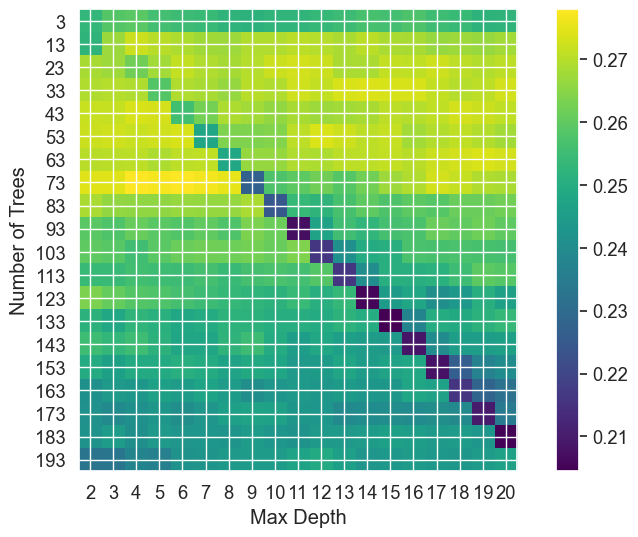

In [124]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

From the heat plot, we can see that the best mean accuracy is achieved with a maximum depth of 8 and 153 trees.

# Random Forest on Wine - raw dataset:

In [125]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_wine, y_wine)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 93}
Mean Accuracy: 0.5163887013679161


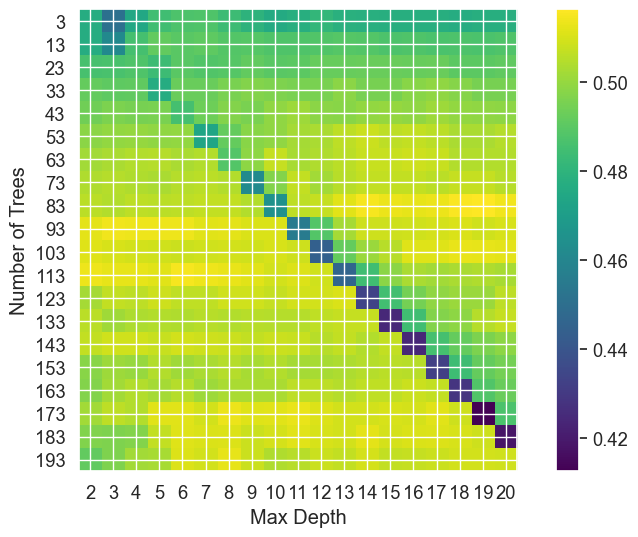

In [126]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

From the heat plot, we can see that the best mean accuracy is achieved with a maximum depth of 10 and 93 trees.

# Random Forest - Abalone PCA dataset

In [127]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(abalone_pca, y_abalone)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'n_estimators': 43}
Mean Accuracy: 0.26239606910580754


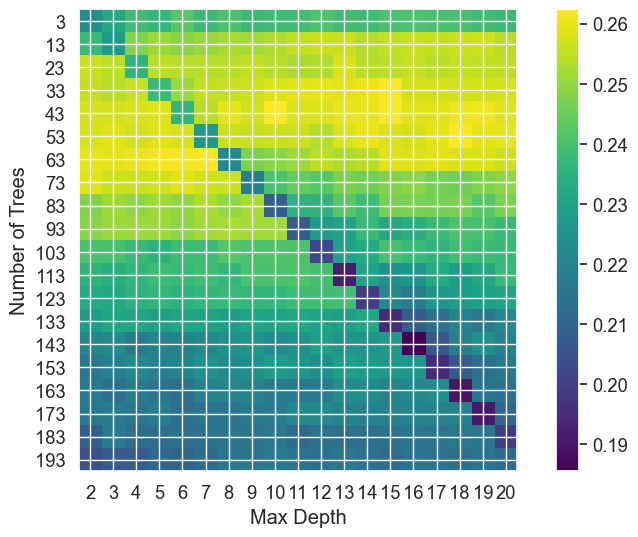

In [128]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

# Random Forest - Wine PCA dataset

In [129]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(wine_pca, y_wine)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'n_estimators': 73}
Mean Accuracy: 0.4341899686149109


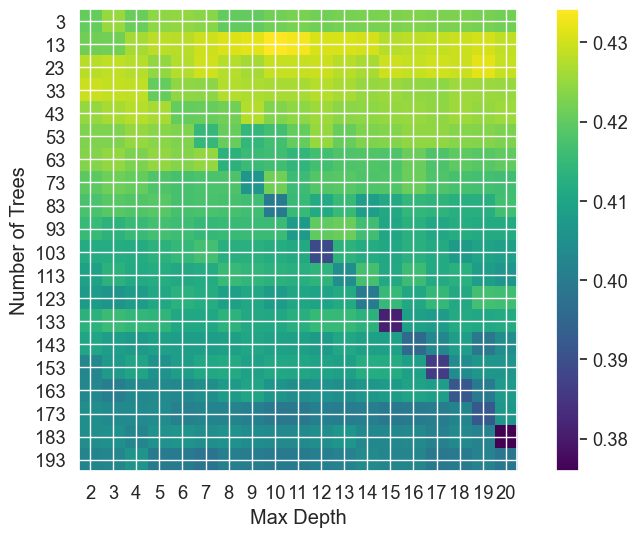

In [130]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

# Random Forest - Abalone LDA dataset

In [131]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_abalone_lda, y_abalone)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 7, 'n_estimators': 73}
Mean Accuracy: 0.26933701974042346


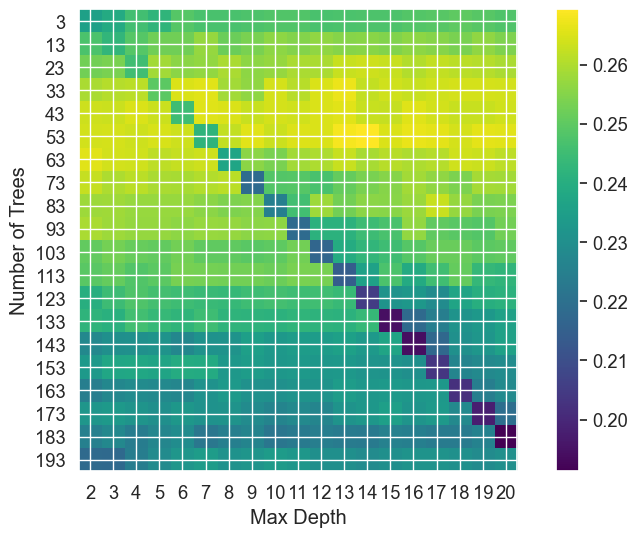

In [132]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

# Random Forest - Wine LDA dataset

In [133]:
# define the range of parameter values
param_grid = {
    'max_depth': range(2, 21),
    'n_estimators': range(3, 201, 10)
}

# create the Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# perform the grid search with 5-fold cross validation
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_wine_lda, y_wine)

# print the best parameters and mean accuracy
print("Best Parameters:", grid_search.best_params_)
print("Mean Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 6, 'n_estimators': 73}
Mean Accuracy: 0.5422585420737845


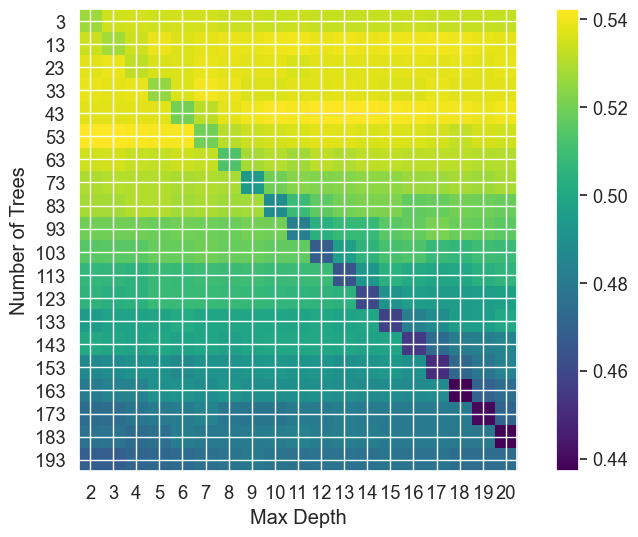

In [134]:
mean_scores = np.array(grid_search.cv_results_['mean_test_score']).reshape(len(param_grid['n_estimators']), len(param_grid['max_depth']))
plt.figure(figsize=(10, 6))
plt.imshow(mean_scores, cmap='viridis', interpolation='nearest')
plt.xticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.yticks(np.arange(len(param_grid['n_estimators'])), param_grid['n_estimators'])
plt.xlabel('Max Depth')
plt.ylabel('Number of Trees')
plt.colorbar()
plt.show()

## Assignment2 Question 5 implementation starts here
### Question 5
5 Gradient Tree Boosting
You will now do classification on your datasets using Gradient Tree Boosting, on sklearn one is
GradientBoostingClassifier, but you can use other implementations if you prefer. Use your
judgement and experience from the other methods to decide how to train this algorithm and choose
it’s settings. At a minimum, pick some good parameter settings, train the model and show some
analysis of it’s performance and runtime compared to Random Forests.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load raw abalone dataset
abalone_df = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\abalone.csv", names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 
                      'Sucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'], sep = ',')

# Separate indep and dep features
X_abalone = abalone_df.iloc[:, 1:-1] # Removed the sex feature
y_abalone = abalone_df.iloc[:, -1]

# Normalize dataset 
sc1 = StandardScaler()
X_abalone = sc1.fit_transform(X_abalone)
X_abalone

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

In [136]:
# Apply PCA on abalone dataset
pca = PCA(n_components=3)
abalone_pca = pca.fit_transform(X_abalone)
abalone_pca_df = pd.DataFrame(data=abalone_pca, columns=['PC1', 'PC2', 'PC3'])
abalone_pca_df

,PC1,PC2,PC3
0,-1.756019,-0.390532,-0.329928
1,-3.362734,-0.105153,0.252264
2,-0.482338,0.252055,-0.443918
3,-1.509041,0.207608,-0.000519
4,-3.654006,-0.272819,0.275035
...,...,...,...
4172,0.801361,0.385426,-0.064832
4173,0.719312,-0.329146,-0.293062
4174,2.167373,0.724010,0.402521
4175,1.647501,-0.305166,-0.306030


In [137]:
# Apply LDA on raw abalone dataset
X_abalone_lda = X_abalone
y_abalone_lda = y_abalone
lda = LinearDiscriminantAnalysis(n_components=3)
X_abalone_lda = lda.fit(X_abalone_lda, y_abalone_lda).transform(X_abalone_lda)
abalone_lda_df = pd.DataFrame(X_abalone_lda, y_abalone_lda)
abalone_lda_df

,0,1,2
Rings,,,
15,-0.791003,-0.235208,0.359351
7,-2.355522,0.336978,0.214024
9,0.766719,-0.246564,1.129422
10,-0.611434,0.098075,0.230542
7,-2.674301,0.527509,0.102575
...,...,...,...
11,0.921330,-0.612381,-0.272399
10,0.425796,-0.894428,-0.034727
9,1.064523,-0.385654,-0.787231


In [138]:
wine_r = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-red.csv", sep=';')
wine_r["colour"]=1
wine_w = pd.read_csv(r"C:\Users\15485\Desktop\UWaterloo_Academics\ECE657A\Assignments\Assignment2\Assignment2_Submission\winequality-white.csv", sep=';')
wine_w["colour"]=0
wine_raw = pd.concat([wine_w,wine_r], ignore_index=True)
wine_raw.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,colour
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.1,0.260,0.29,12.4,0.044,62.0,240.0,0.9969,3.04,0.42,9.2,6,0
96,6.0,0.340,0.66,15.9,0.046,26.0,164.0,0.9979,3.14,0.50,8.8,6,0
97,8.6,0.265,0.36,1.2,0.034,15.0,80.0,0.9913,2.95,0.36,11.4,7,0
98,9.8,0.360,0.46,10.5,0.038,4.0,83.0,0.9956,2.89,0.30,10.1,4,0


In [139]:
# Separate indep and dep features
X_wine1 = wine_raw.iloc[:, :-2]
y_wine = wine_raw.iloc[:, -2]
X_wine = pd.concat([X_wine1, wine_raw.iloc[:, -1]], axis=1)

# Normalize dataset 
sc2 = StandardScaler()
X_wine = sc2.fit_transform(X_wine)
X_wine.shape, y_wine.shape

# Apply PCA on wine dataset for dimensionality reduction
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(X_wine)
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PC1', 'PC2'])
wine_pca_df

,PC1,PC2
0,-2.185179,3.529983
1,-0.247707,-0.553177
2,-0.380592,0.365447
3,-1.735882,0.929351
4,-1.735882,0.929351
...,...,...
6492,2.699833,-0.854172
6493,2.524458,-1.161039
6494,2.775507,-0.761733
6495,2.984356,-0.767021


In [140]:
# Apply LDA on raw wine dataset
X_wine_lda = X_wine
y_wine_lda = y_wine
lda = LinearDiscriminantAnalysis(n_components=2)
X_wine_lda = lda.fit(X_wine_lda, y_wine_lda).transform(X_wine_lda)
wine_lda_df = pd.DataFrame(X_wine_lda, y_wine_lda)
print(wine_lda_df.shape)
wine_lda_df

(6497, 2)


,0,1
quality,,
6,0.752078,-1.466209
6,1.445150,0.392049
6,-0.123015,0.911451
6,0.288961,-0.721769
6,0.288961,-0.721769
...,...,...
5,0.512278,-0.224430
6,-0.514707,-0.597340
6,-0.231160,-0.831907


# Gradient Boosting on Abalone dataset

In [141]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_abalone, y_abalone, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=153, learning_rate=0.1, max_depth=8)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_score:.4f}")

Accuracy score: 0.2380


In [143]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = model.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = model.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.25      0.23      0.24        13
           5       0.41      0.34      0.37        32
           6       0.30      0.27      0.29        48
           7       0.26      0.26      0.26        84
           8       0.27      0.33      0.30        99
           9       0.25      0.32      0.28       142
          10       0.30      0.30      0.30       139
          11       0.19      0.23      0.21        93
          12       0.12      0.10      0.11        51
          13       0.09      0.10      0.09        31
          14       0.20      0.04      0.06        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
  

The accuracy on the abalone raw dataset using Gradient Boosting classifier is less than Random Forests when using similar parameters, possibly due to the effect of outliers. It takes longer to train with Gradient Boosting than Random Forests.

In [144]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_score:.4f}")

Accuracy score: 0.2584


In [145]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = model.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = model.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           3       0.40      0.67      0.50         3
           4       0.32      0.46      0.37        13
           5       0.45      0.41      0.43        32
           6       0.27      0.23      0.25        48
           7       0.34      0.36      0.35        84
           8       0.28      0.36      0.31        99
           9       0.31      0.37      0.33       142
          10       0.26      0.28      0.27       139
          11       0.25      0.20      0.22        93
          12       0.03      0.02      0.02        51
          13       0.06      0.06      0.06        31
          14       0.25      0.15      0.19        26
          15       0.10      0.05      0.06        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
  

Upon using more optimum parameters for Gradient Boosting, the accuracy increases. This low accuracy may be due to the fact that the features are highly correlated.

# Gradient Boosting on Wine dataset

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_score:.4f}")

Accuracy score: 0.6008


The accuracy of Gradient boosting on the wine - raw dataset is more than that of Random forests and this may be due to the fact that the dataset has outliers and is not balanced. When the dataset contains imbalanced classes, Random Forests may produce biased predictions towards the majority class, as each tree is built independently and can be influenced by the class imbalance, while Gradient Boosting Classifier can adjust the weights of the samples to balance the classes

# Gradient Boosting on Abalone - PCA dataset

In [147]:
X_train, X_test, y_train, y_test = train_test_split(abalone_pca, y_abalone, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_score:.4f}")

Accuracy score: 0.1148


In [148]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = model.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = model.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.29      0.15      0.20        13
           5       0.04      0.03      0.03        32
           6       0.05      0.04      0.05        48
           7       0.00      0.00      0.00        84
           8       0.10      0.01      0.02        99
           9       0.10      0.06      0.07       142
          10       0.18      0.54      0.27       139
          11       0.00      0.00      0.00        93
          12       0.25      0.02      0.04        51
          13       0.04      0.06      0.05        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.03      0.15      0.05        13
          17       0.00      0.00      0.00         8
          18       0.03      0.17      0.05        12
          19       0.00      0.00      0.00         7
  

The accuracy on PCA dataset upon using Gradient Boosting is lesser than Random forests. Overall it can be seen that PCA hurts the performance of a tree boosting classifier as data has been lost while reducing the number of dimensions.

# Gradient Boosting on Wine - PCA dataset

In [149]:
X_train, X_test, y_train, y_test = train_test_split(wine_pca, y_wine, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_score:.4f}")

Accuracy score: 0.5392


In [150]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = model.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = model.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.32      0.22      0.26        46
           5       0.57      0.56      0.56       420
           6       0.55      0.63      0.59       579
           7       0.50      0.38      0.43       221
           8       0.35      0.25      0.29        32

    accuracy                           0.54      1300
   macro avg       0.38      0.34      0.36      1300
weighted avg       0.54      0.54      0.53      1300

Confusion Matrix: 
 [[  0   0   2   0   0   0]
 [  1  10  10  21   2   2]
 [  2  10 236 159  10   3]
 [  3   7 141 362  61   5]
 [  1   3  24 103  85   5]
 [  0   1   3   8  12   8]]
Training Score:  0.8289397729459304
Testing Score:  0.5392307692307692


The training score is 82% whereas the same classifer has a training score of approximately 70% on raw data without PCA reduction. So in this case, PCA helps in improving the accuracy but there is a considerable amount of overfitting.

# Gradient Boosting on Abalone - LDA dataset

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_abalone_lda, y_abalone, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_score:.4f}")

Accuracy score: 0.2165


In [152]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = model.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = model.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.43      0.59      0.50        32
           6       0.34      0.31      0.33        48
           7       0.30      0.26      0.28        84
           8       0.22      0.32      0.26        99
           9       0.27      0.25      0.26       142
          10       0.18      0.19      0.18       139
          11       0.15      0.14      0.14        93
          12       0.17      0.14      0.15        51
          13       0.11      0.19      0.14        31
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.36      0.31      0.33        13
          17       0.08      0.12      0.10         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
  

Training score is high as when the dataset has a small number of samples, Gradient boosting can overfit and since most features in the abalone dataset is highly correlated, dimensionality reduction has a positive effect on efficient computation. But testing score is very low as there is considerable loss of data and Gradient boosting works better with more features. The mean accuracy using Random Forests is 0.27 whereas for Gradient boosting, it is lower. This is possible if there are too many outliers/high correlation in the dataset, which is true for this case.

# Gradient Boosting on Wine - LDA dataset

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_wine_lda, y_wine, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc_score:.4f}")

Accuracy score: 0.5531


In [154]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification Report: \n', classification_report(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
gdb_train_acc = model.score(X_train, y_train) 
print('Training Score: ', gdb_train_acc)
gdb_test_acc = model.score(X_test, y_test)
print('Testing Score: ', gdb_test_acc)

Classification Report: 
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.09      0.14        46
           5       0.60      0.66      0.63       420
           6       0.54      0.64      0.59       579
           7       0.49      0.29      0.37       221
           8       0.20      0.03      0.05        32

    accuracy                           0.55      1300
   macro avg       0.36      0.29      0.30      1300
weighted avg       0.54      0.55      0.53      1300

Confusion Matrix: 
 [[  0   0   2   0   0   0]
 [  0   4  26  15   1   0]
 [  2   4 279 131   4   0]
 [  1   3 152 370  49   4]
 [  2   1   5 148  65   0]
 [  0   0   0  18  13   1]]
Training Score:  0.6492207042524534
Testing Score:  0.553076923076923


There is less overfitting in the training data after using LDA and Gradient boosting techniques. The test accuracy is also close but not very high. Compared to random forests, the accuracy is similar on Wine - LDA dataset.